In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data= pd.read_csv('/content/ToyotaCorolla - MLR.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
data.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [ ]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
data.isnull()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
data.value_counts()

Price  Age_08_04  KM      Fuel_Type  HP   Automatic  cc    Doors  Cylinders  Gears  Weight
24950  8          13253   Diesel     116  0          2000  5      4          5      1320      2
4350   44         158320  Diesel     69   0          1800  5      4          5      1110      1
10950  54         71725   Petrol     110  0          1600  4      4          5      1035      1
       57         80470   Petrol     110  0          1600  5      4          5      1085      1
                  61682   Petrol     110  0          1600  3      4          5      1050      1
                                                                                             ..
8950   54         149329  Diesel     72   0          2000  5      4          5      1135      1
                  64000   Petrol     97   0          1400  3      4          5      1025      1
                  61000   Diesel     69   0          2000  5      4          5      1140      1
       53         115113  Petrol     97   0          1400  3      4          5      1025      1
32500  4          1       Diesel     116  0          2000  5      4          5      1480      1
Name: count, Length: 1435, dtype: int64

<Axes: >

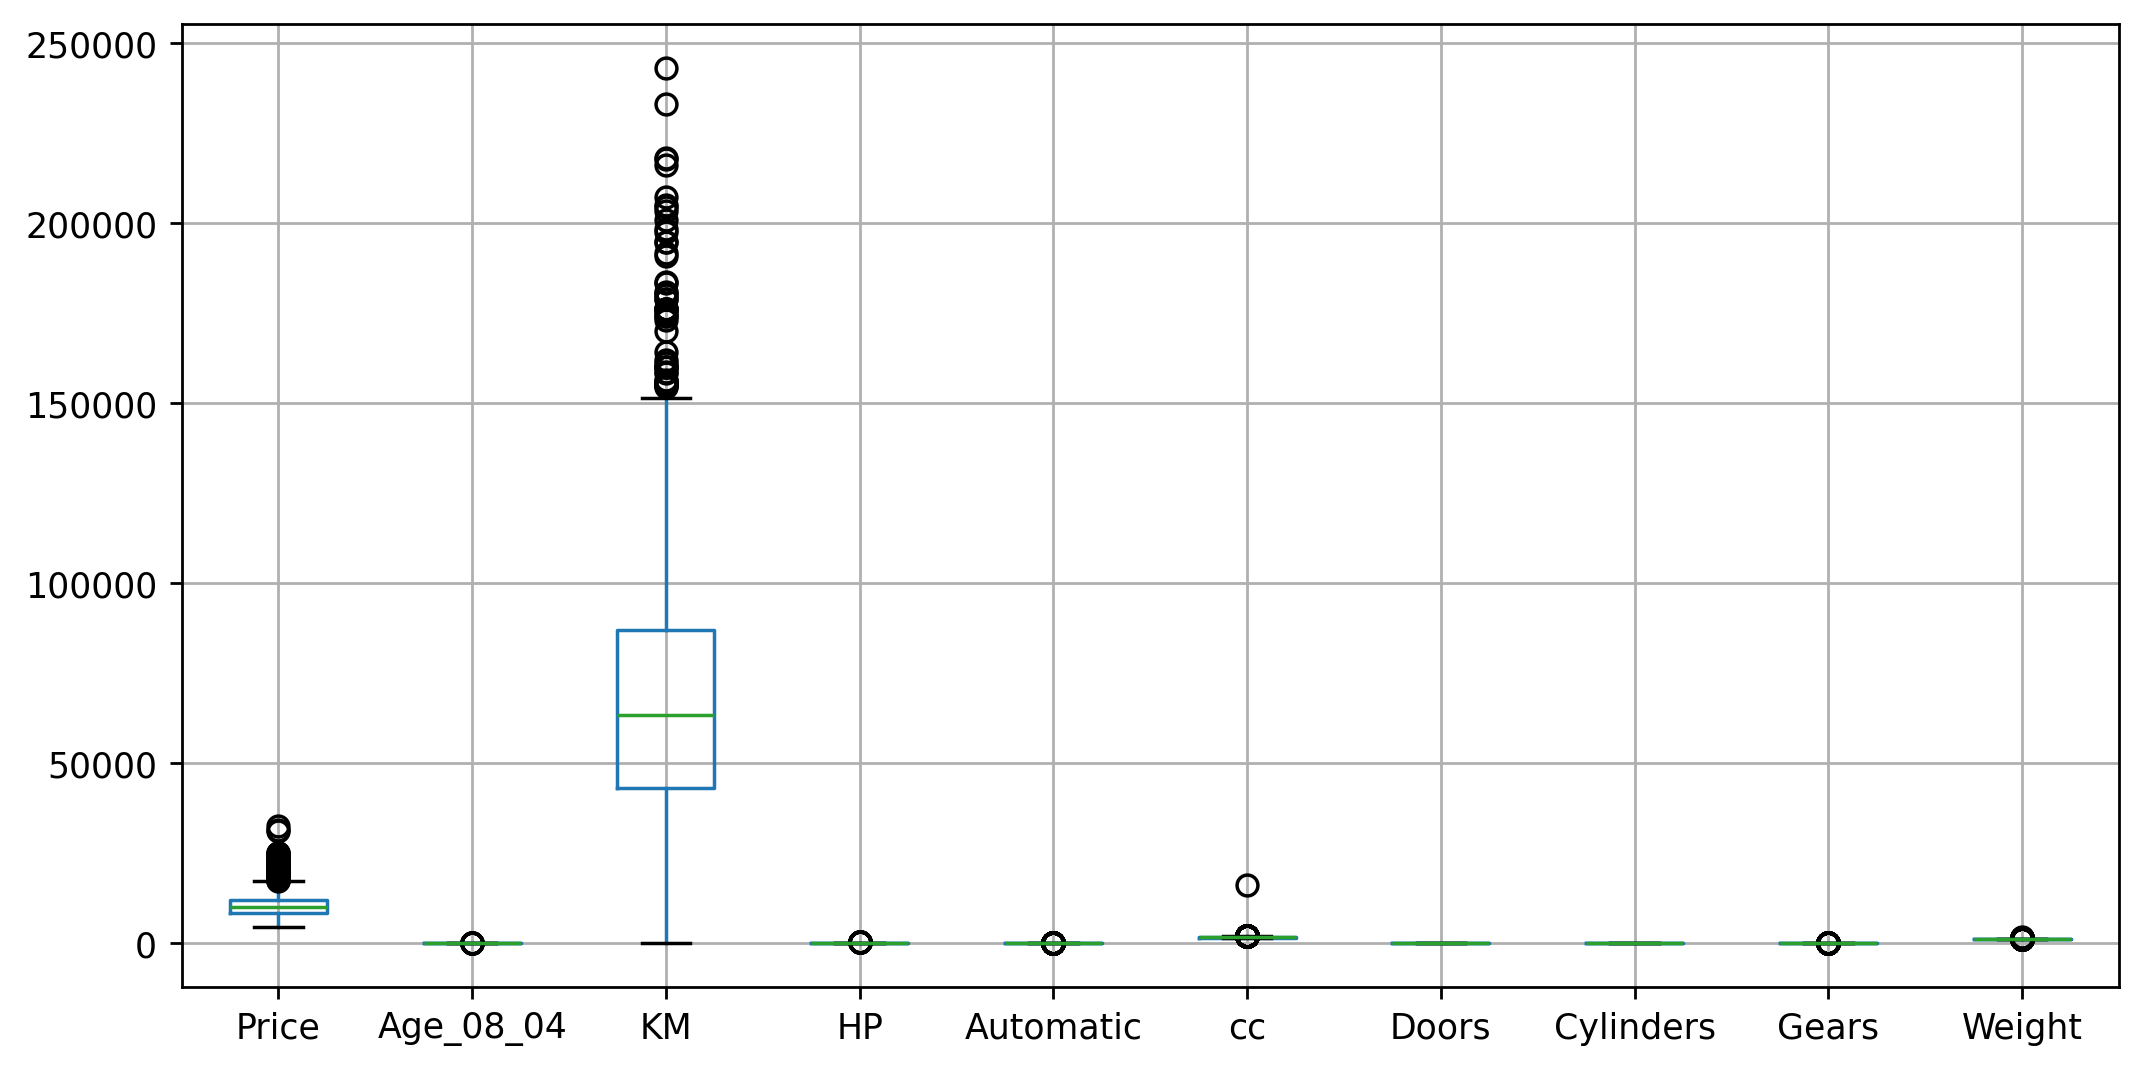

In [ ]:
data.boxplot()

In [ ]:
data.duplicated().sum()

1

In [ ]:
data.drop_duplicates(inplace=True,keep='first')

In [ ]:
data.duplicated().sum()

0

## **Data Vizualization**

In [ ]:
data.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [ ]:
data.rename(columns={'Age_08_04':'Age'},inplace=True)


In [ ]:
data

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [ ]:
data

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


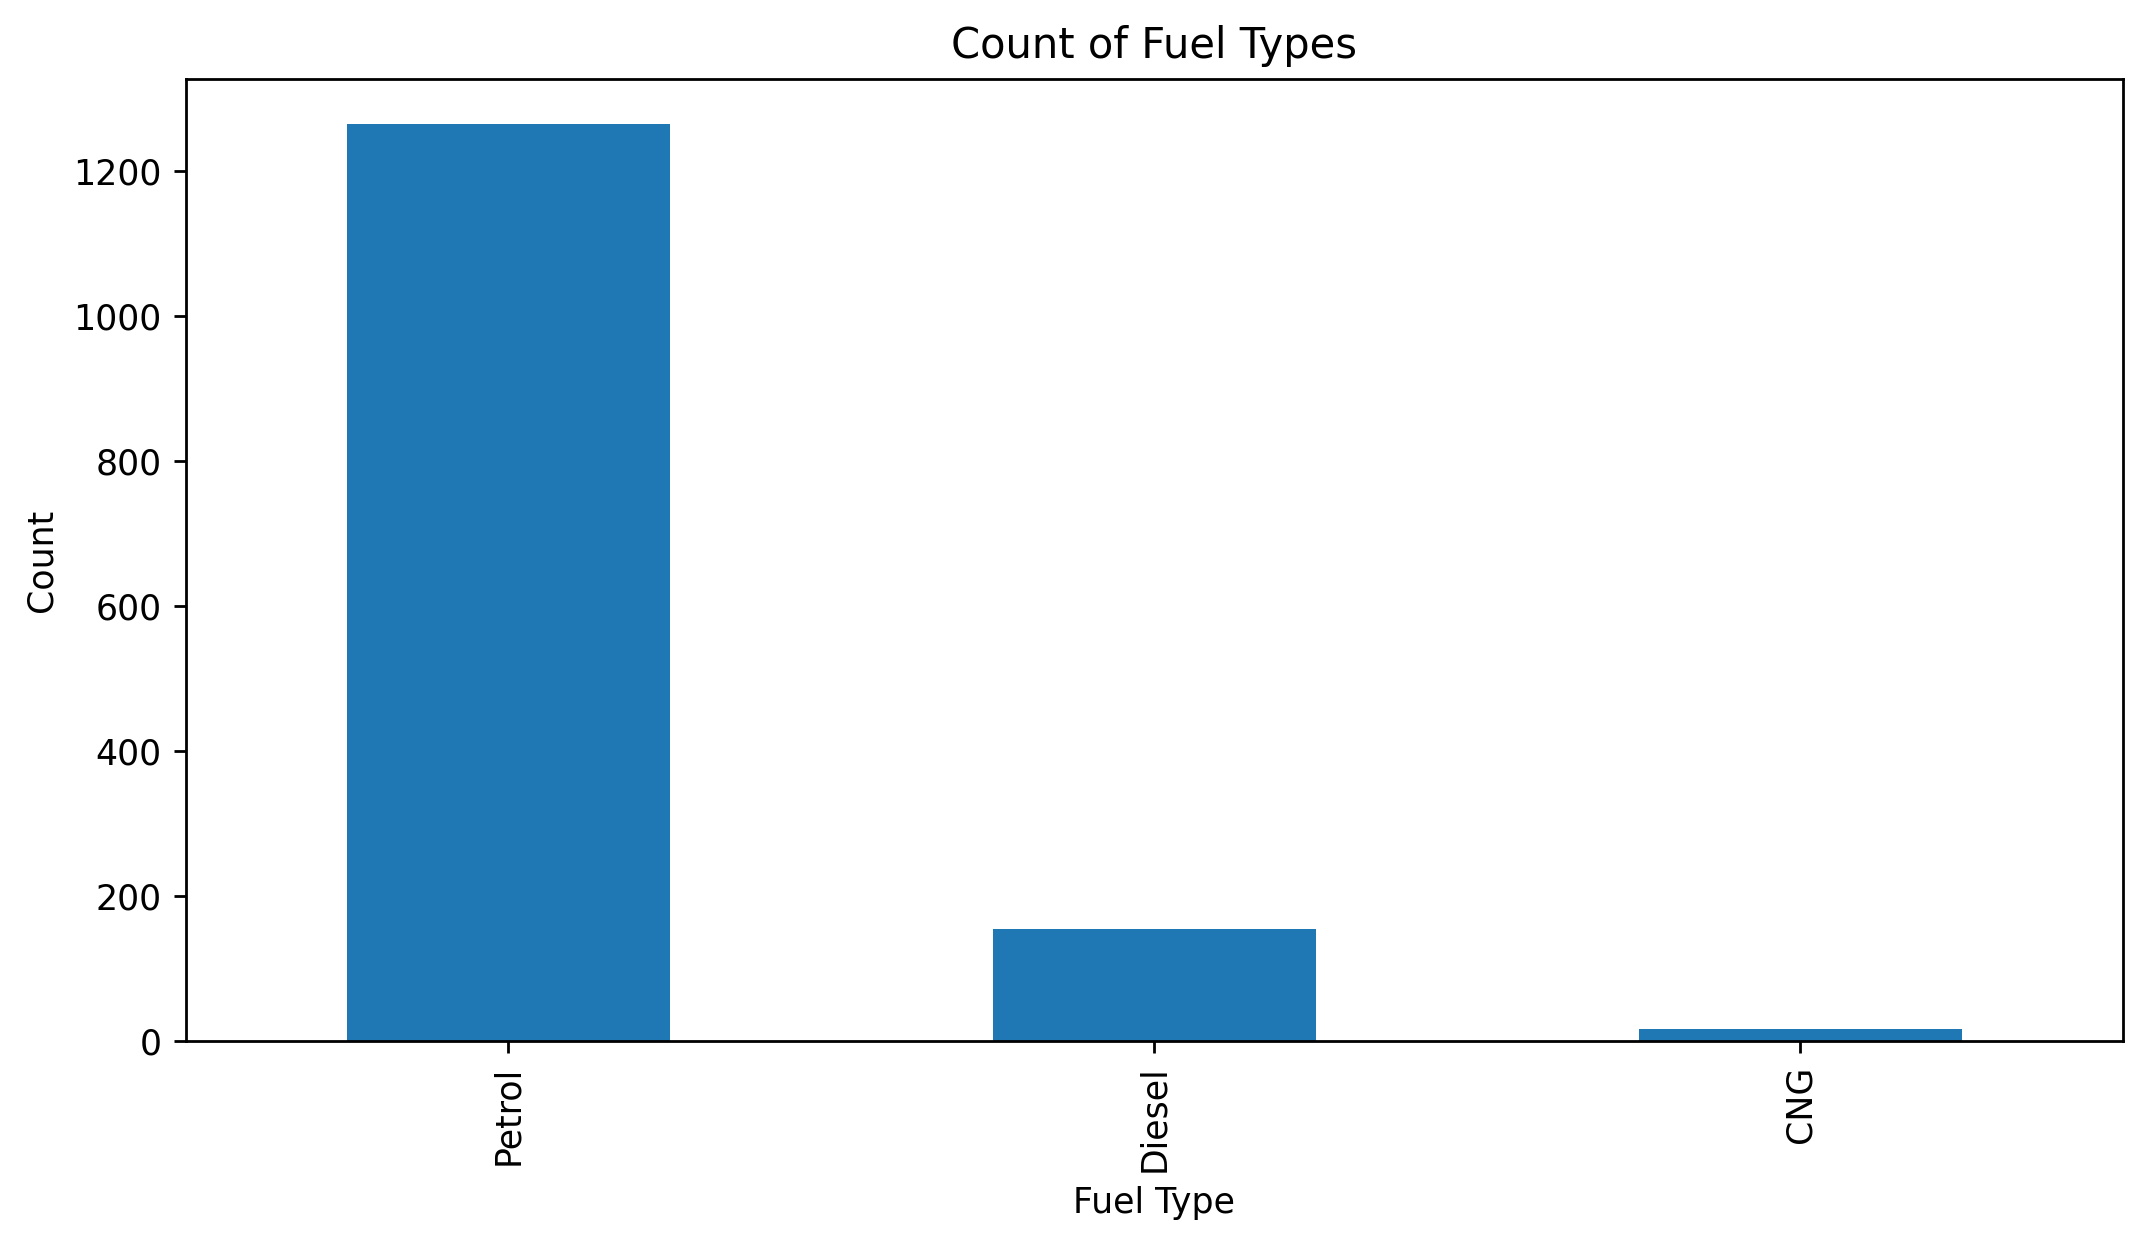

In [ ]:
import matplotlib.pyplot as plt

data['Fuel_Type'].value_counts().plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Count of Fuel Types')
plt.show()


Text(0, 0.5, 'Frequency')

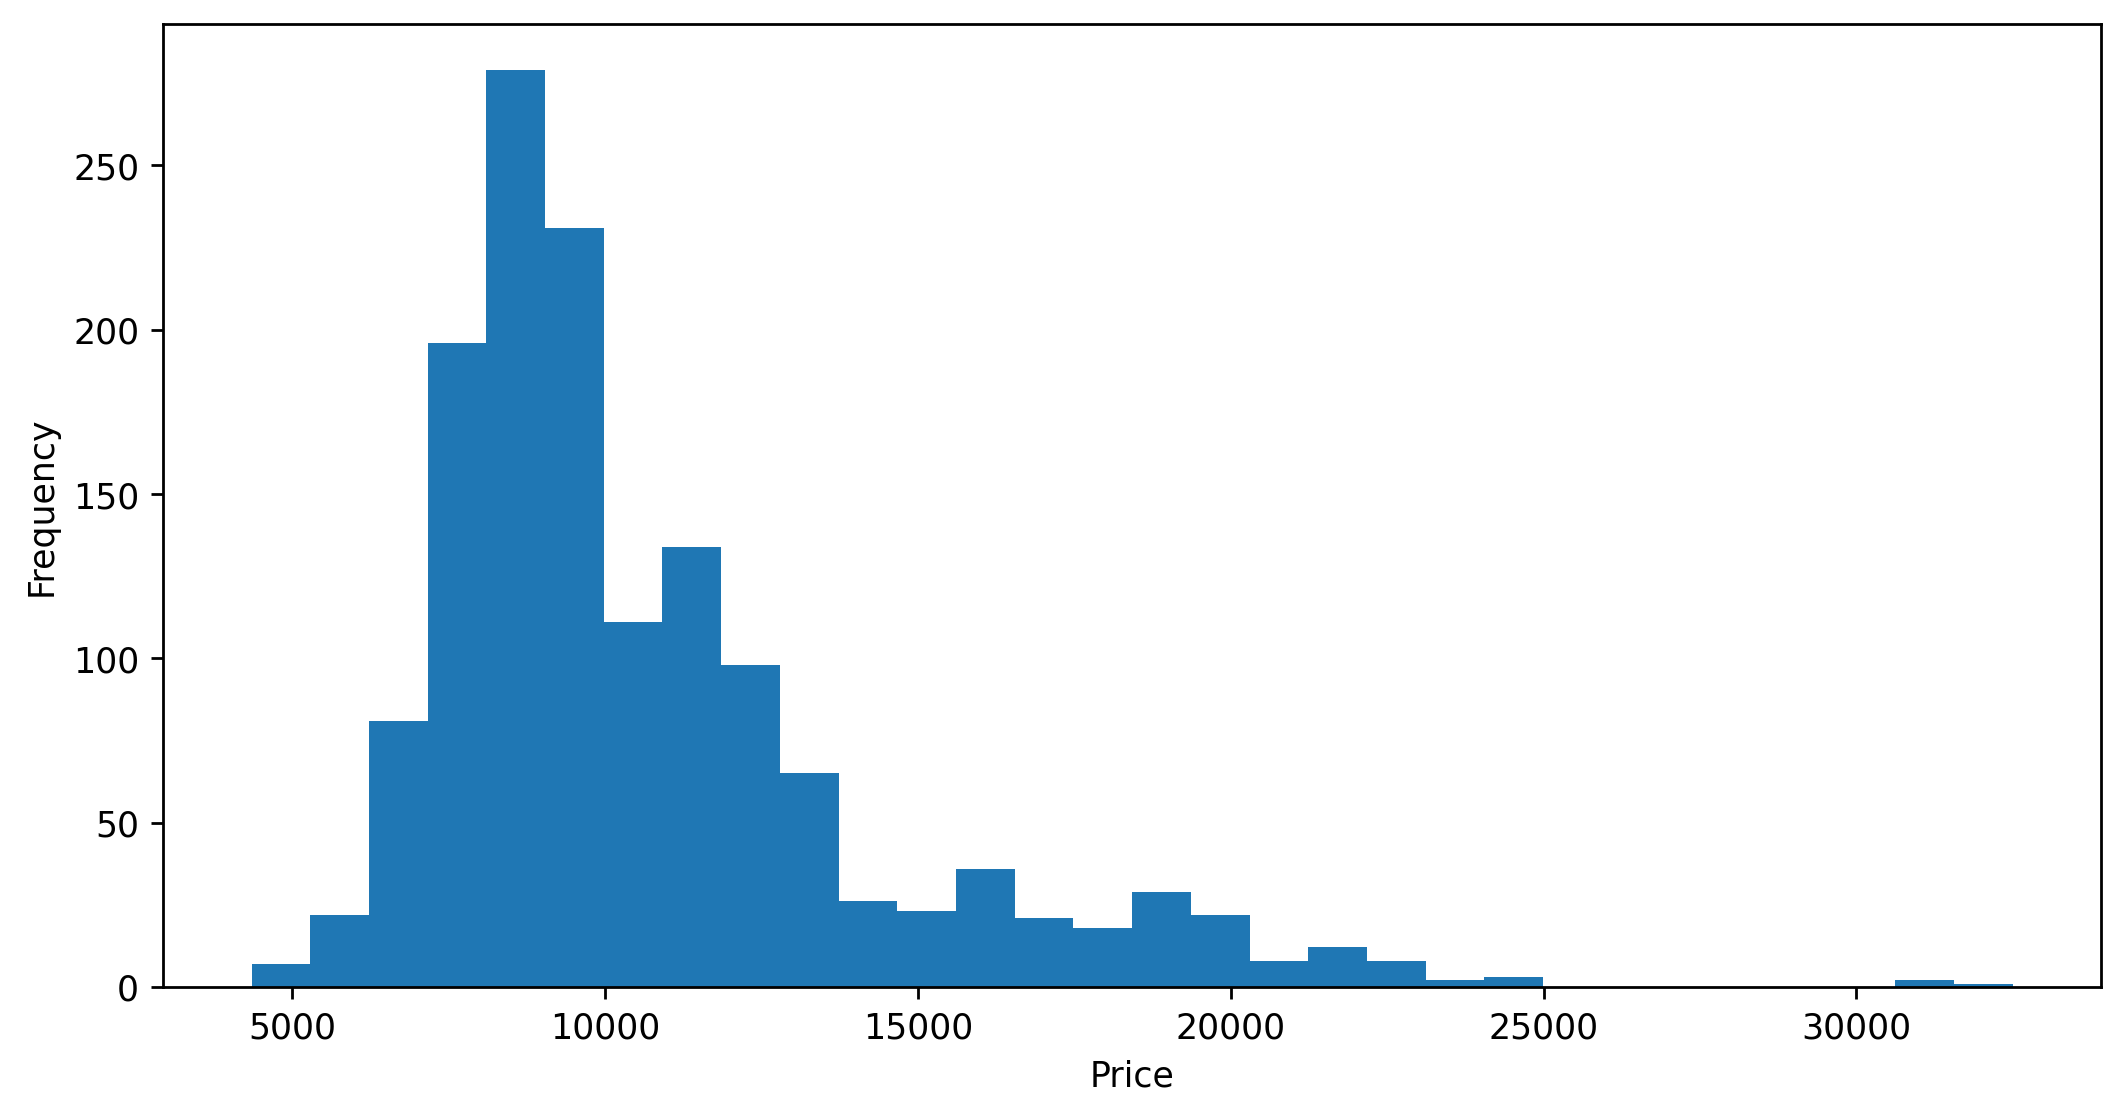

In [ ]:
plt.hist(data['Price'],bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')

(array([  4.,   4.,  15.,  10.,  17.,   9.,  21.,  30.,  11.,  27.,  16.,
         21.,  35.,  10.,  63.,  60.,  27.,  40.,  65.,  37.,  80.,  48.,
         97., 102.,  87., 130.,  70.,  60., 102., 137.]),
 array([ 1.        ,  3.63333333,  6.26666667,  8.9       , 11.53333333,
        14.16666667, 16.8       , 19.43333333, 22.06666667, 24.7       ,
        27.33333333, 29.96666667, 32.6       , 35.23333333, 37.86666667,
        40.5       , 43.13333333, 45.76666667, 48.4       , 51.03333333,
        53.66666667, 56.3       , 58.93333333, 61.56666667, 64.2       ,
        66.83333333, 69.46666667, 72.1       , 74.73333333, 77.36666667,
        80.        ]),
 <BarContainer object of 30 artists>)

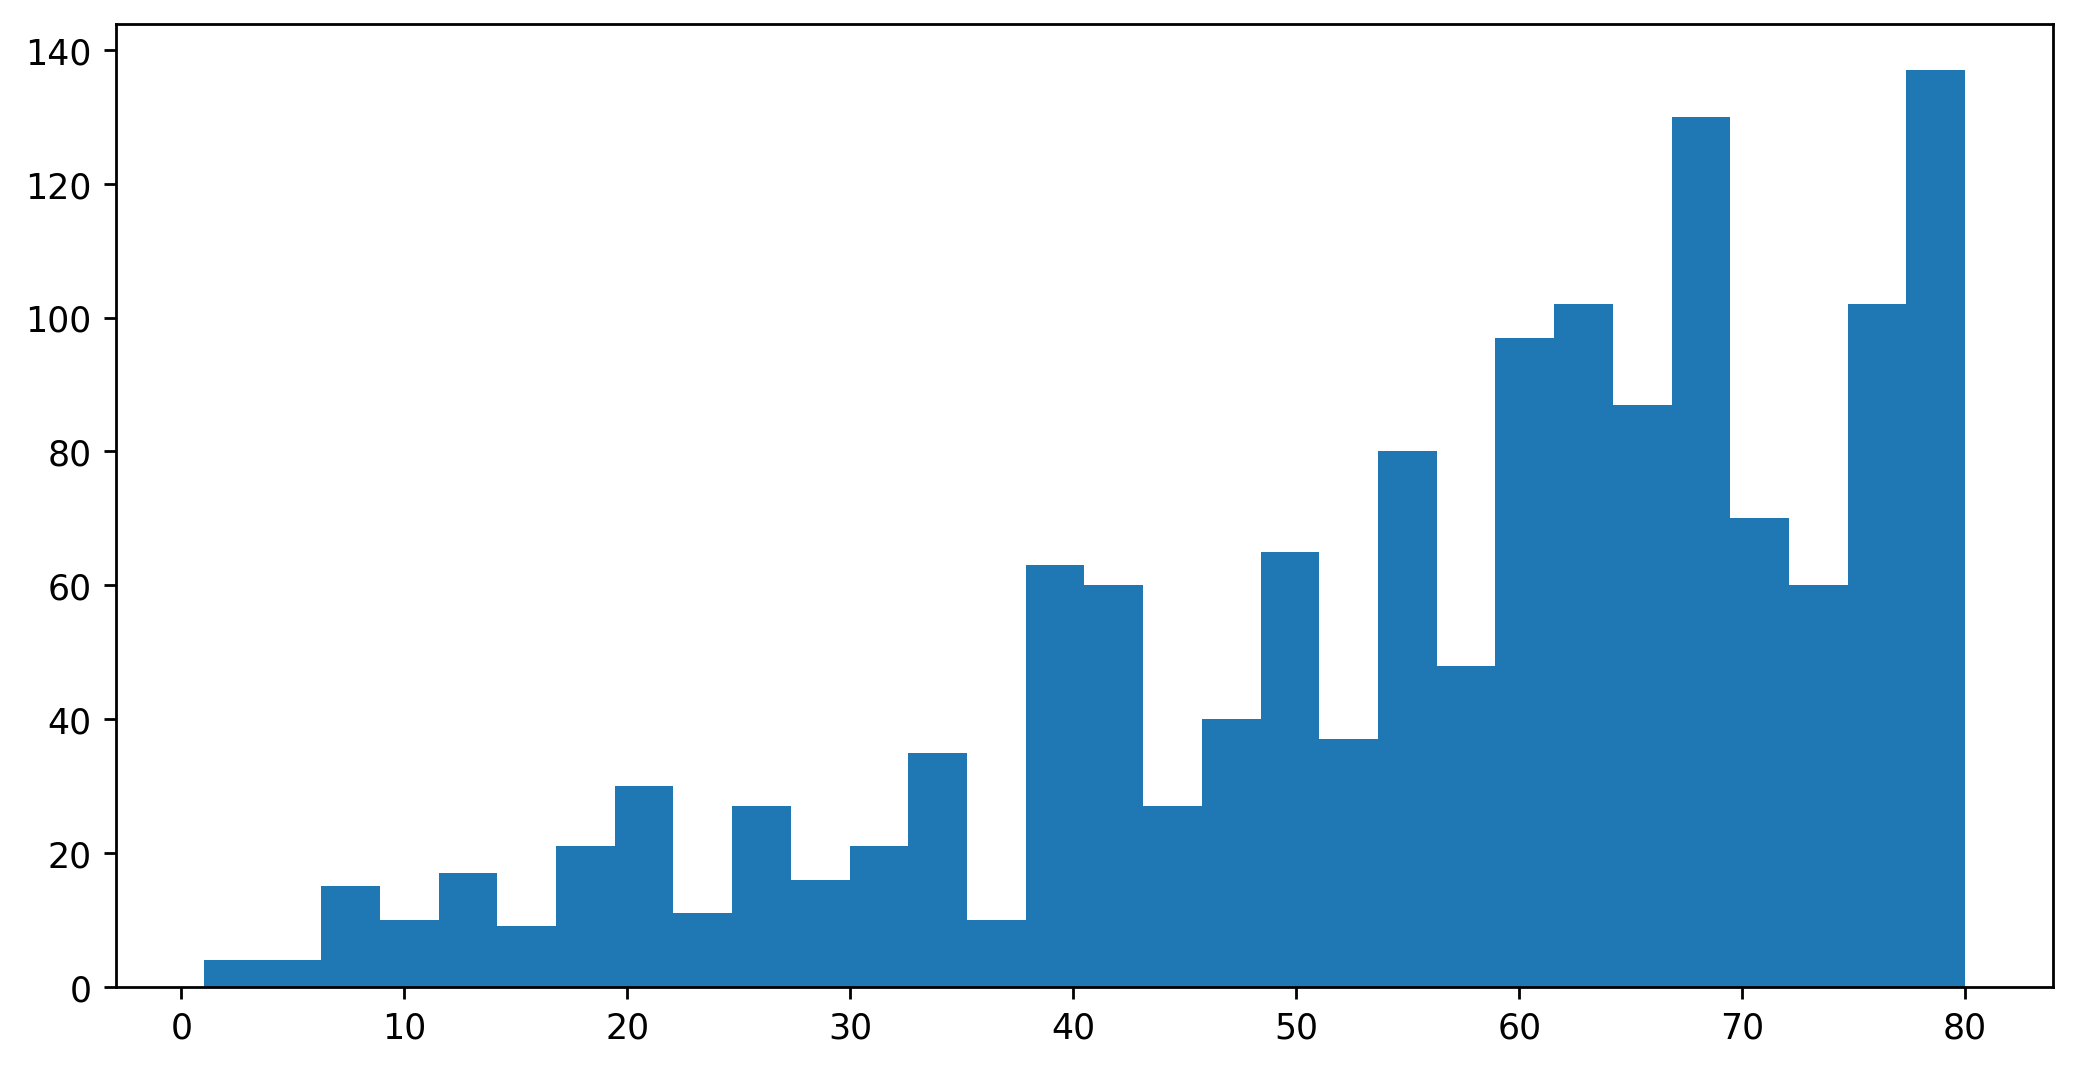

In [ ]:
plt.hist(data['Age'],bins=30)


(array([ 29.,  35.,  57.,  92., 121., 118., 124., 165., 128., 134.,  94.,
         73.,  66.,  37.,  37.,  29.,  22.,  13.,  12.,  16.,   2.,   8.,
          7.,   2.,   5.,   4.,   3.,   0.,   1.,   1.]),
 array([1.00000000e+00, 8.10096667e+03, 1.62009333e+04, 2.43009000e+04,
        3.24008667e+04, 4.05008333e+04, 4.86008000e+04, 5.67007667e+04,
        6.48007333e+04, 7.29007000e+04, 8.10006667e+04, 8.91006333e+04,
        9.72006000e+04, 1.05300567e+05, 1.13400533e+05, 1.21500500e+05,
        1.29600467e+05, 1.37700433e+05, 1.45800400e+05, 1.53900367e+05,
        1.62000333e+05, 1.70100300e+05, 1.78200267e+05, 1.86300233e+05,
        1.94400200e+05, 2.02500167e+05, 2.10600133e+05, 2.18700100e+05,
        2.26800067e+05, 2.34900033e+05, 2.43000000e+05]),
 <BarContainer object of 30 artists>)

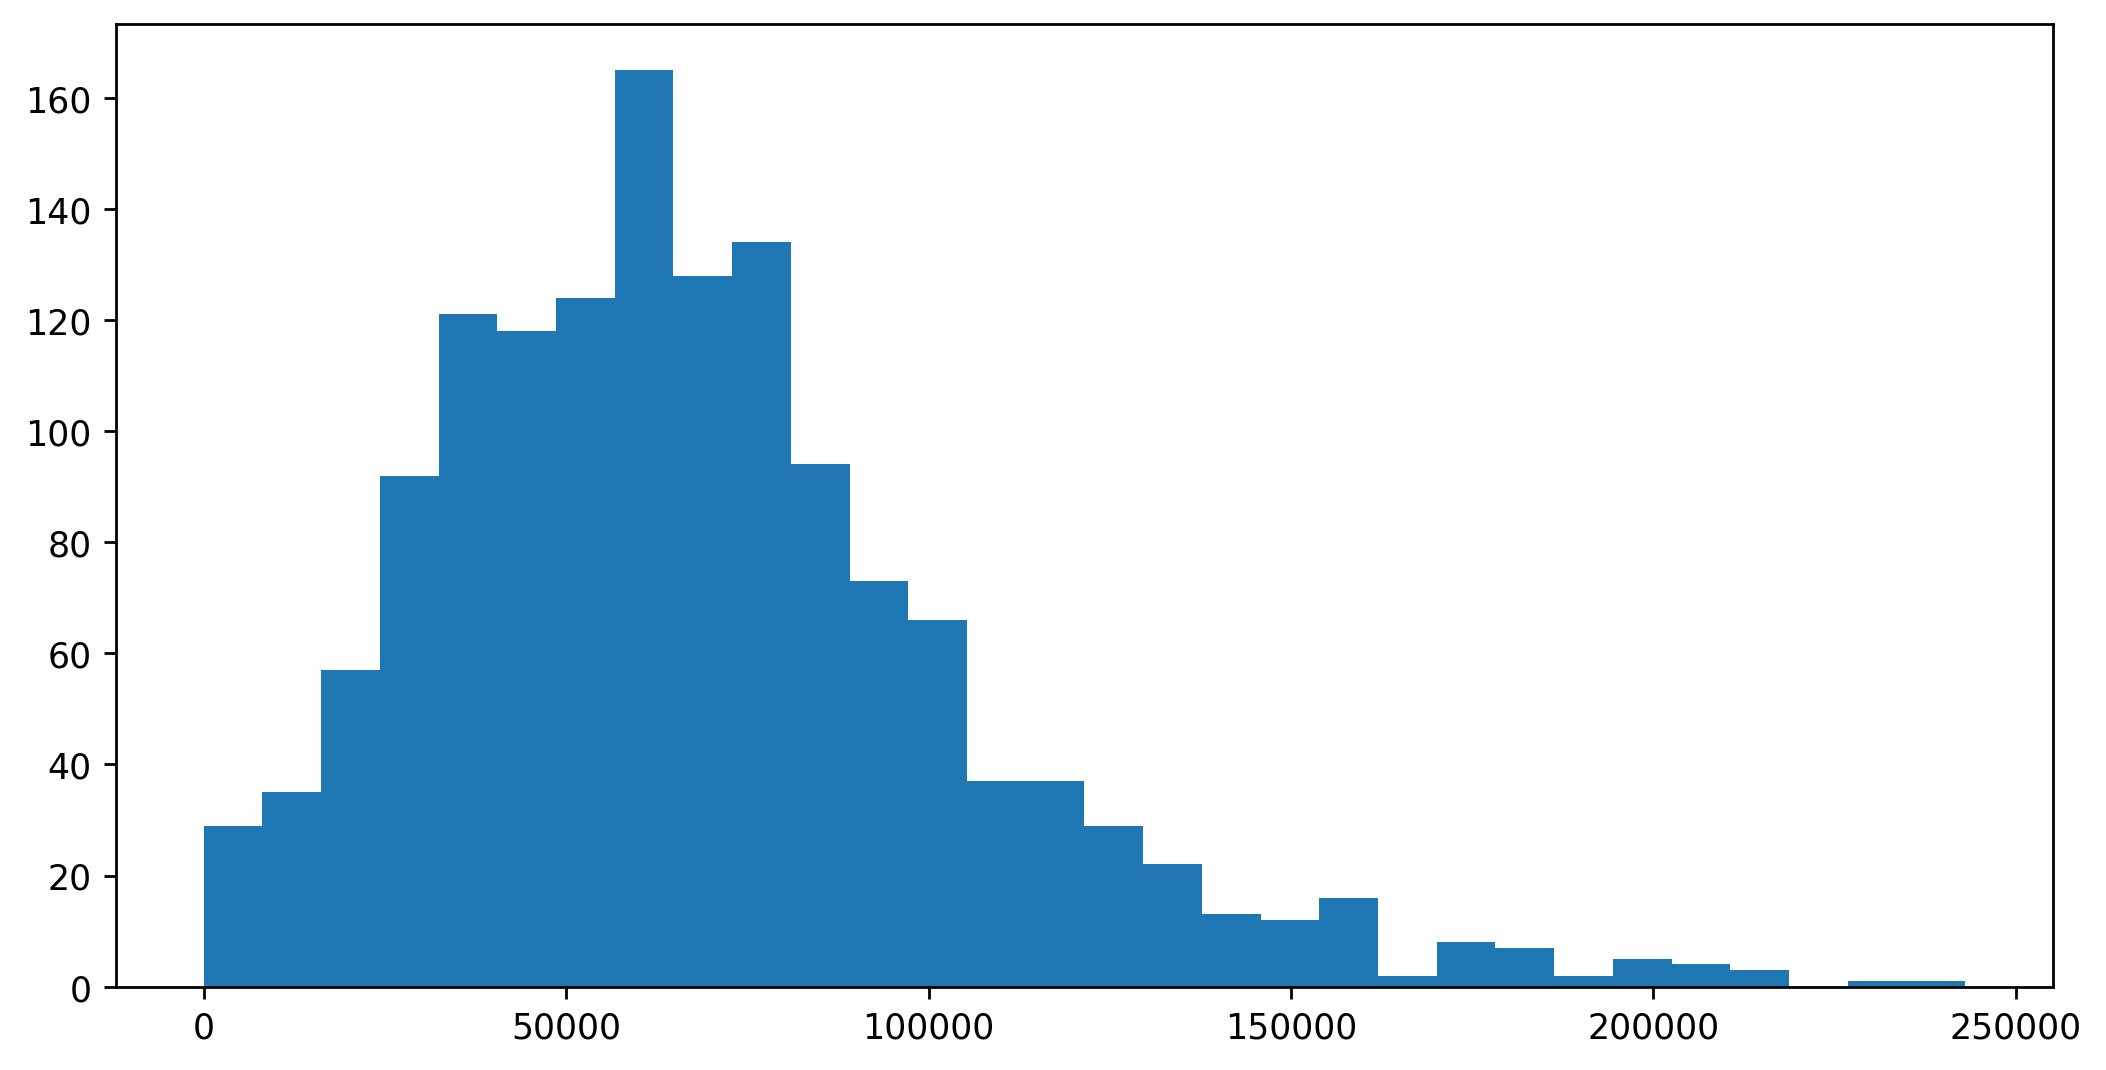

In [ ]:
plt.hist(data['KM'],bins=30)

(array([109.,   0.,   0.,   0., 249.,  36., 164.,   2.,   0.,  21., 835.,
          8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  11.]),
 array([ 69. ,  73.1,  77.2,  81.3,  85.4,  89.5,  93.6,  97.7, 101.8,
        105.9, 110. , 114.1, 118.2, 122.3, 126.4, 130.5, 134.6, 138.7,
        142.8, 146.9, 151. , 155.1, 159.2, 163.3, 167.4, 171.5, 175.6,
        179.7, 183.8, 187.9, 192. ]),
 <BarContainer object of 30 artists>)

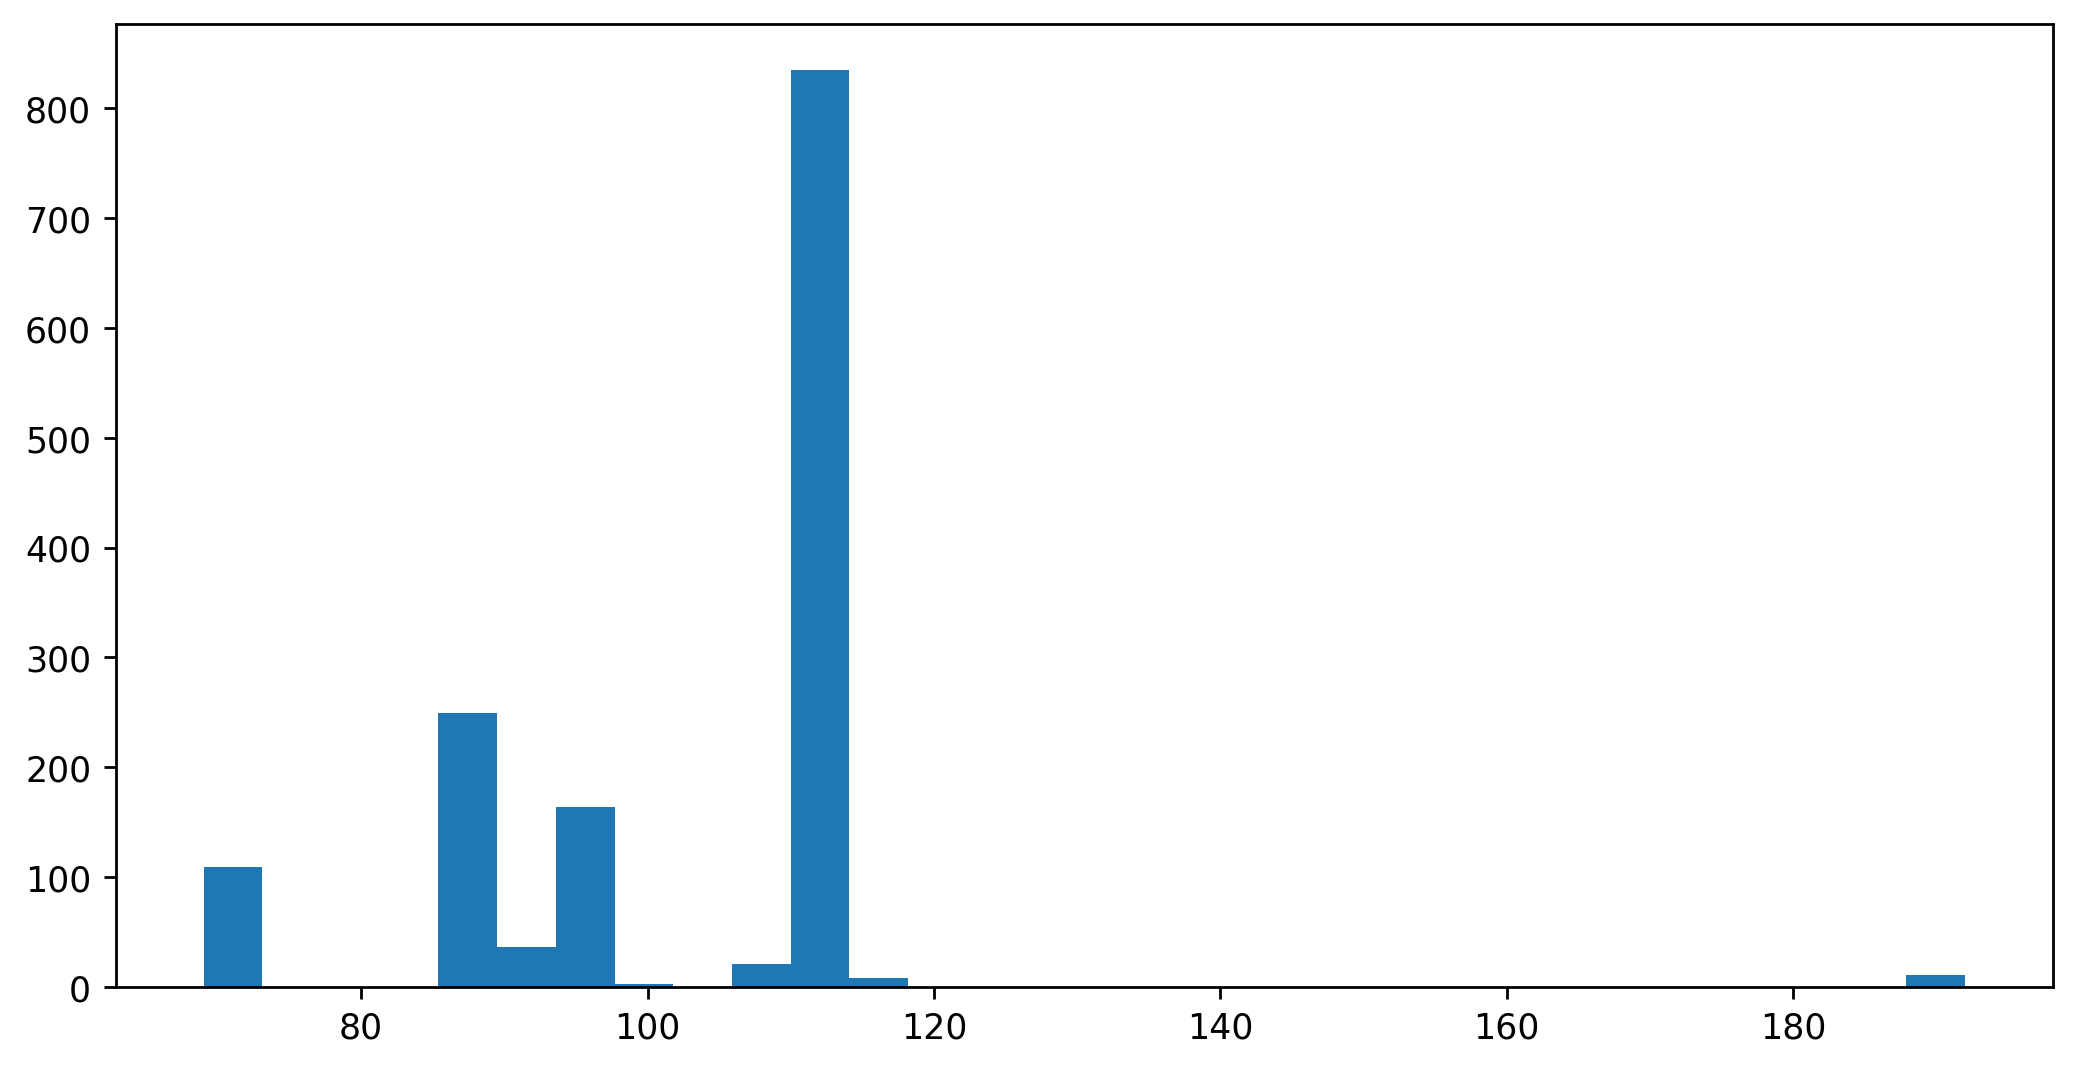

In [ ]:
plt.hist(data['HP'],bins=30)

<Axes: xlabel='HP', ylabel='Count'>

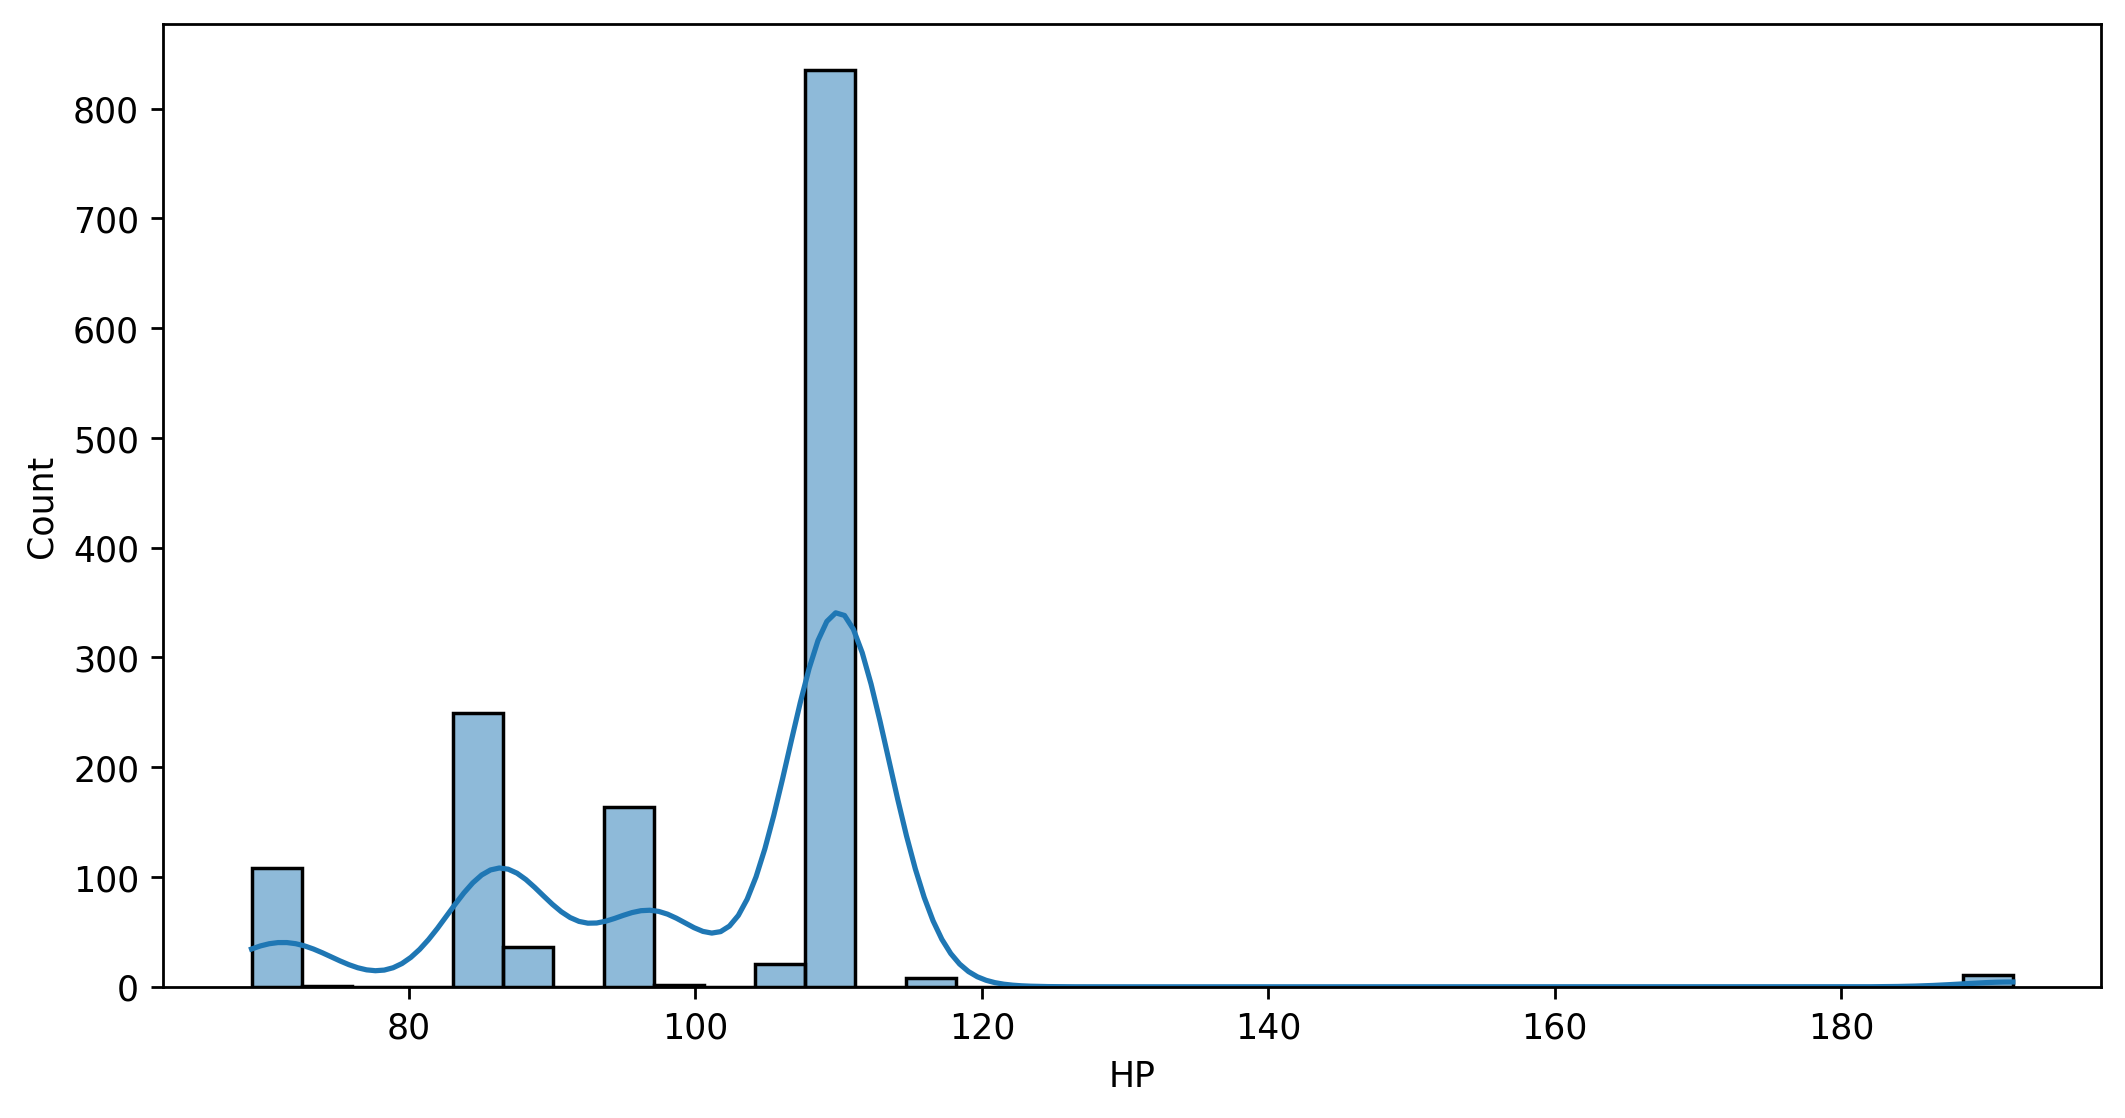

In [ ]:
sns.histplot(x=data['HP'],kde=True)

(array([1.269e+03, 1.650e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1300.,  1790.,  2280.,  2770.,  3260.,  3750.,  4240.,  4730.,
         5220.,  5710.,  6200.,  6690.,  7180.,  7670.,  8160.,  8650.,
         9140.,  9630., 10120., 10610., 11100., 11590., 12080., 12570.,
        13060., 13550., 14040., 14530., 15020., 15510., 16000.]),
 <BarContainer object of 30 artists>)

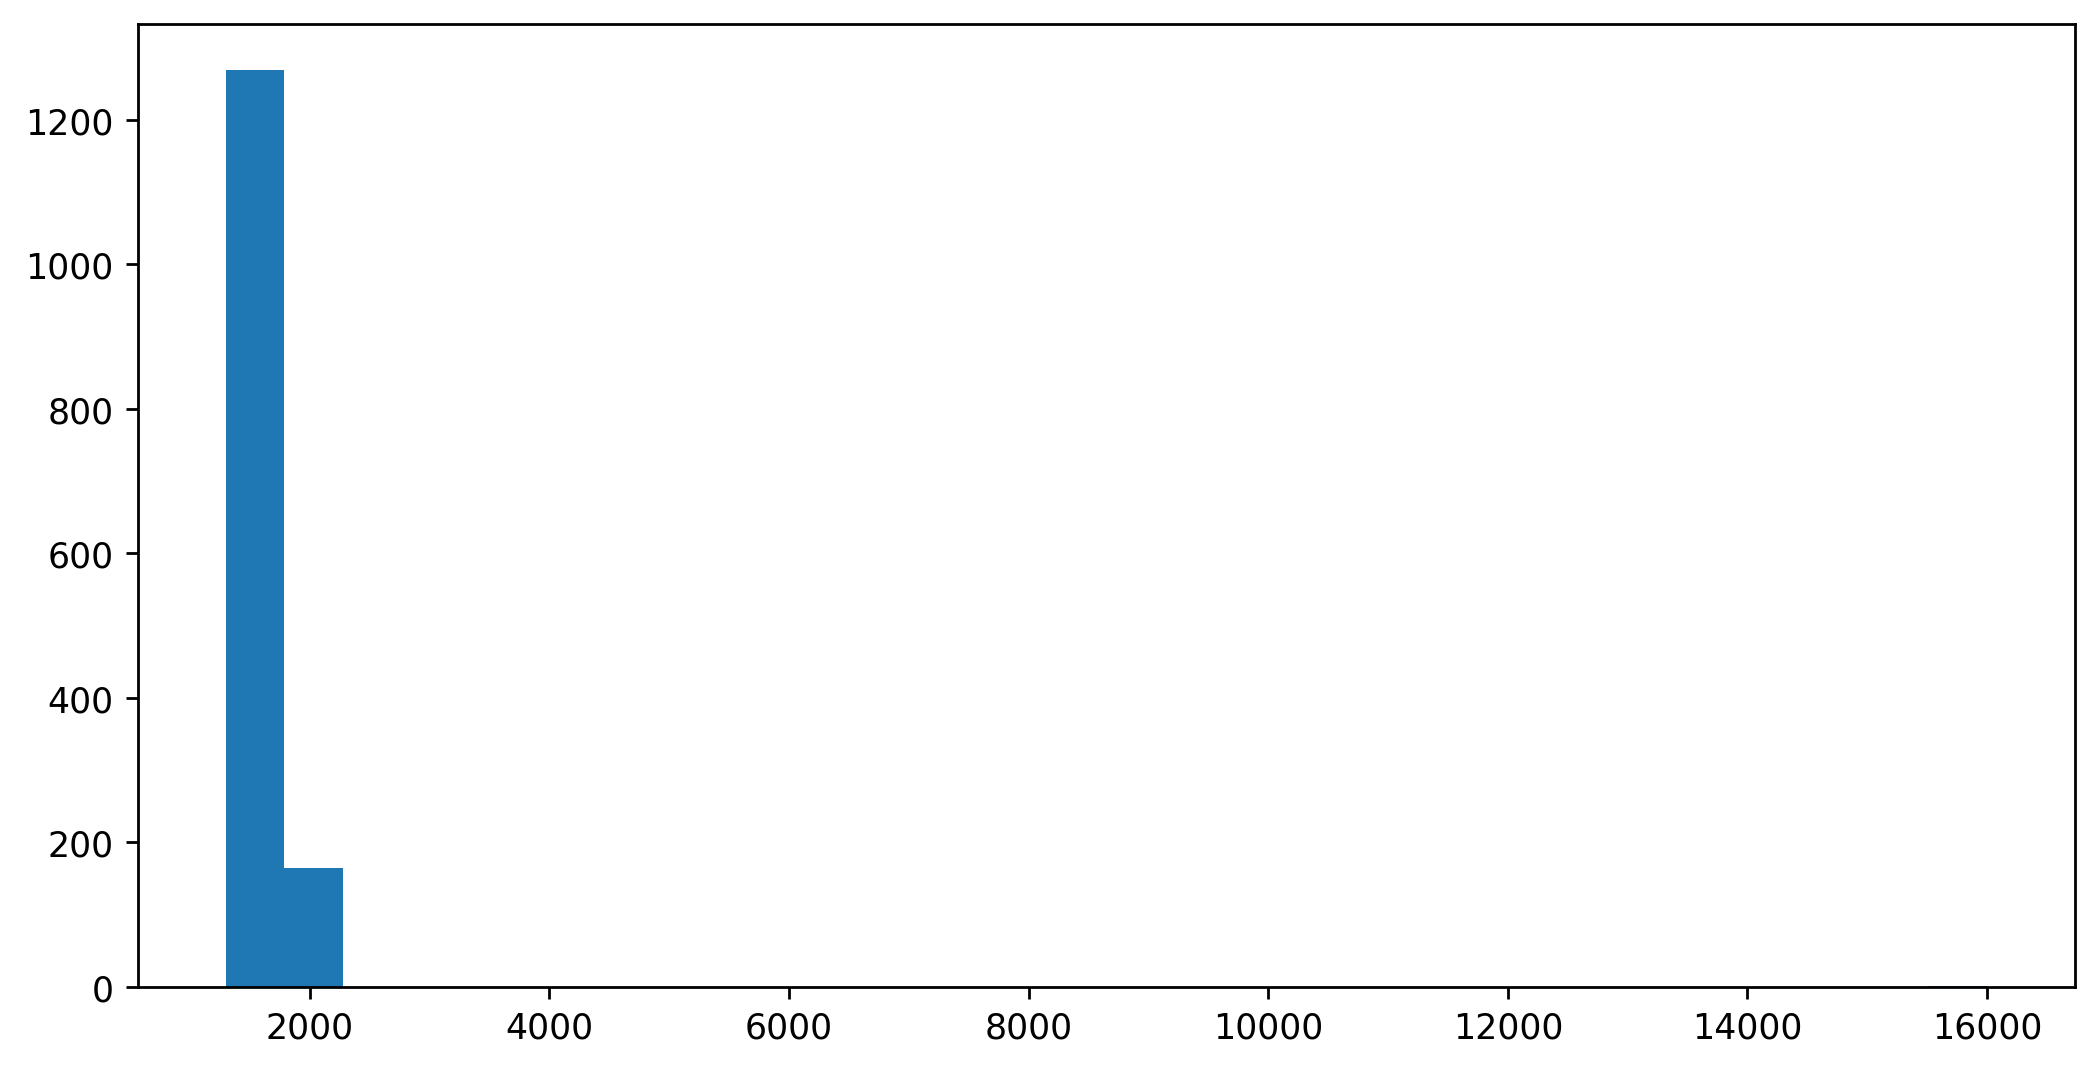

In [ ]:
plt.hist(data['cc'],bins=30)

<Axes: xlabel='Doors'>

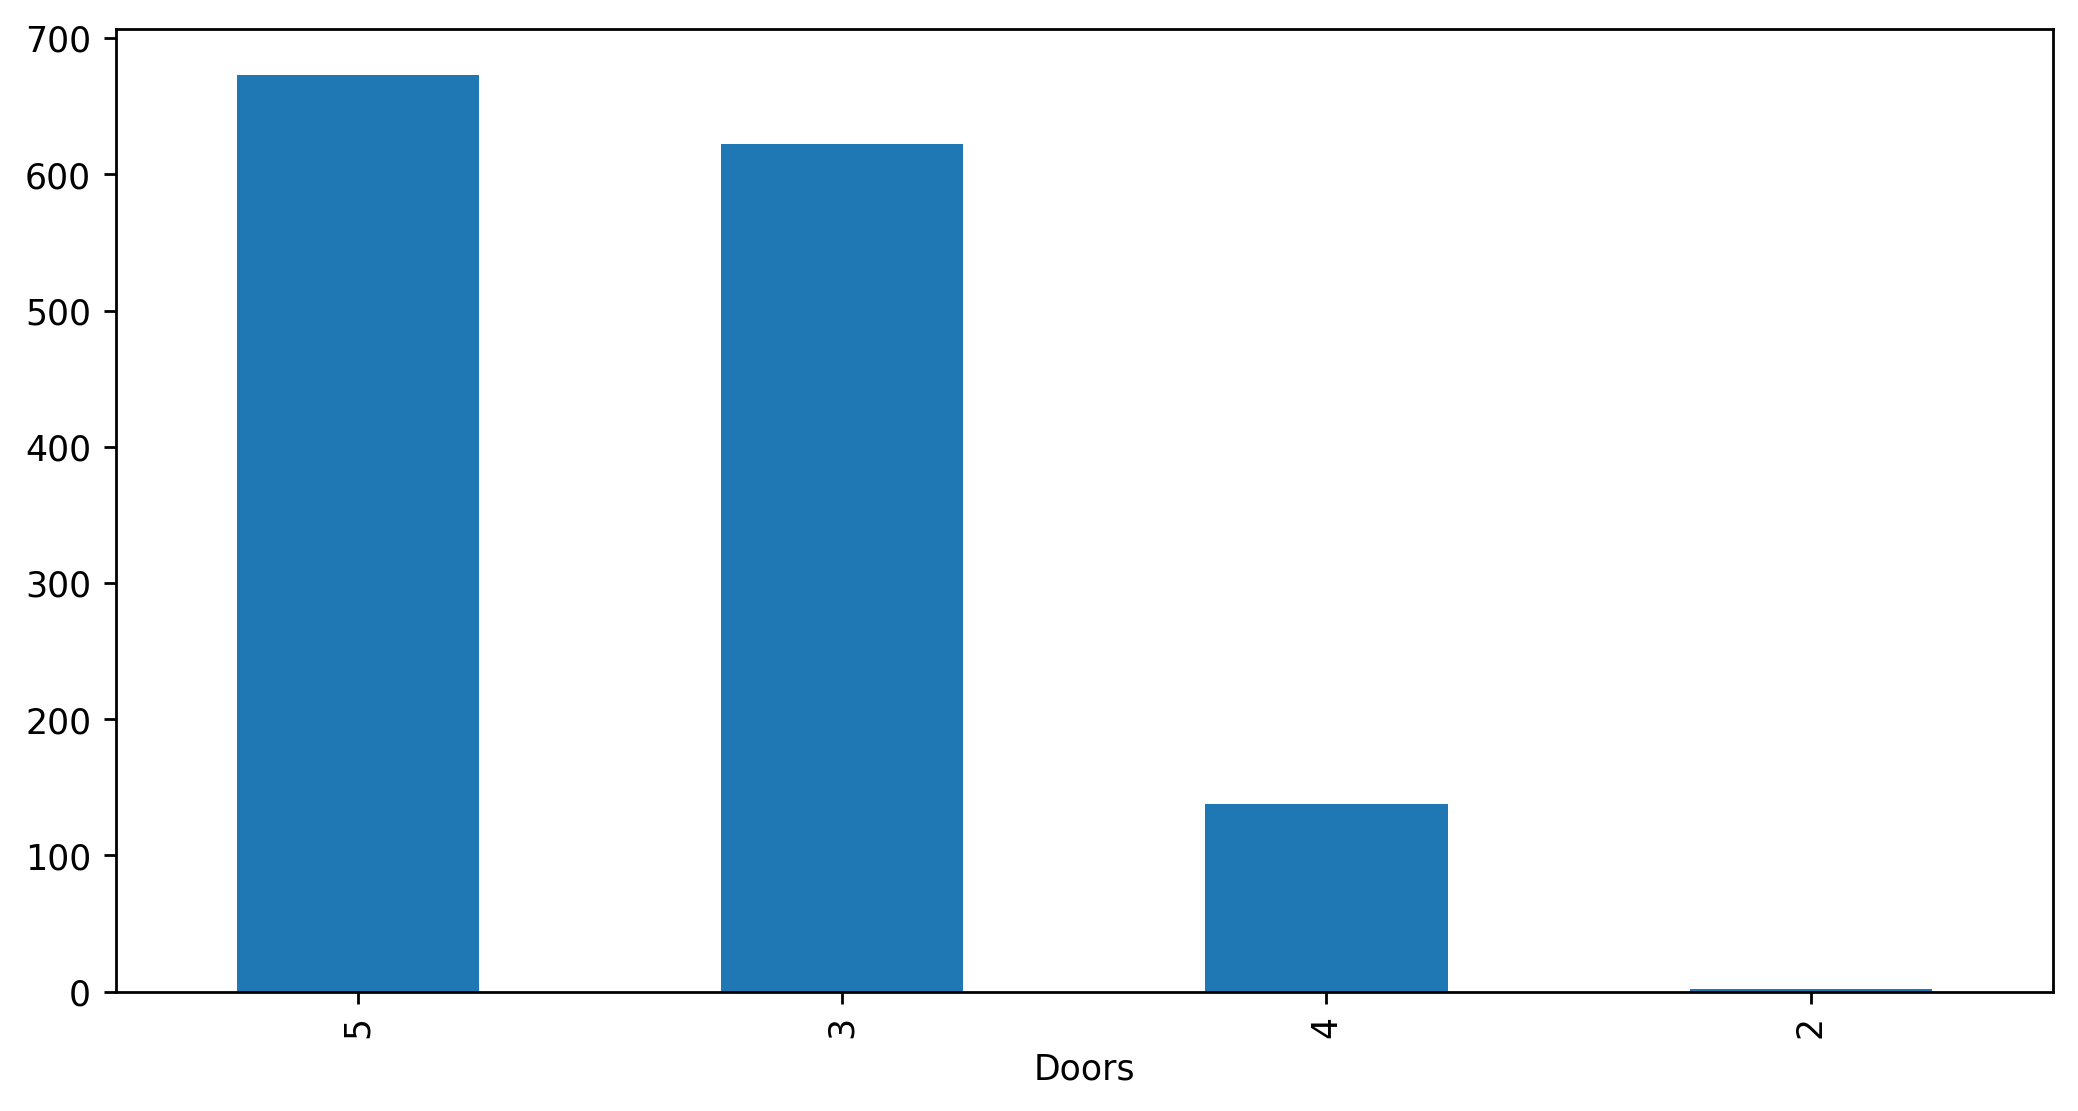

In [ ]:
data['Doors'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Automatic')

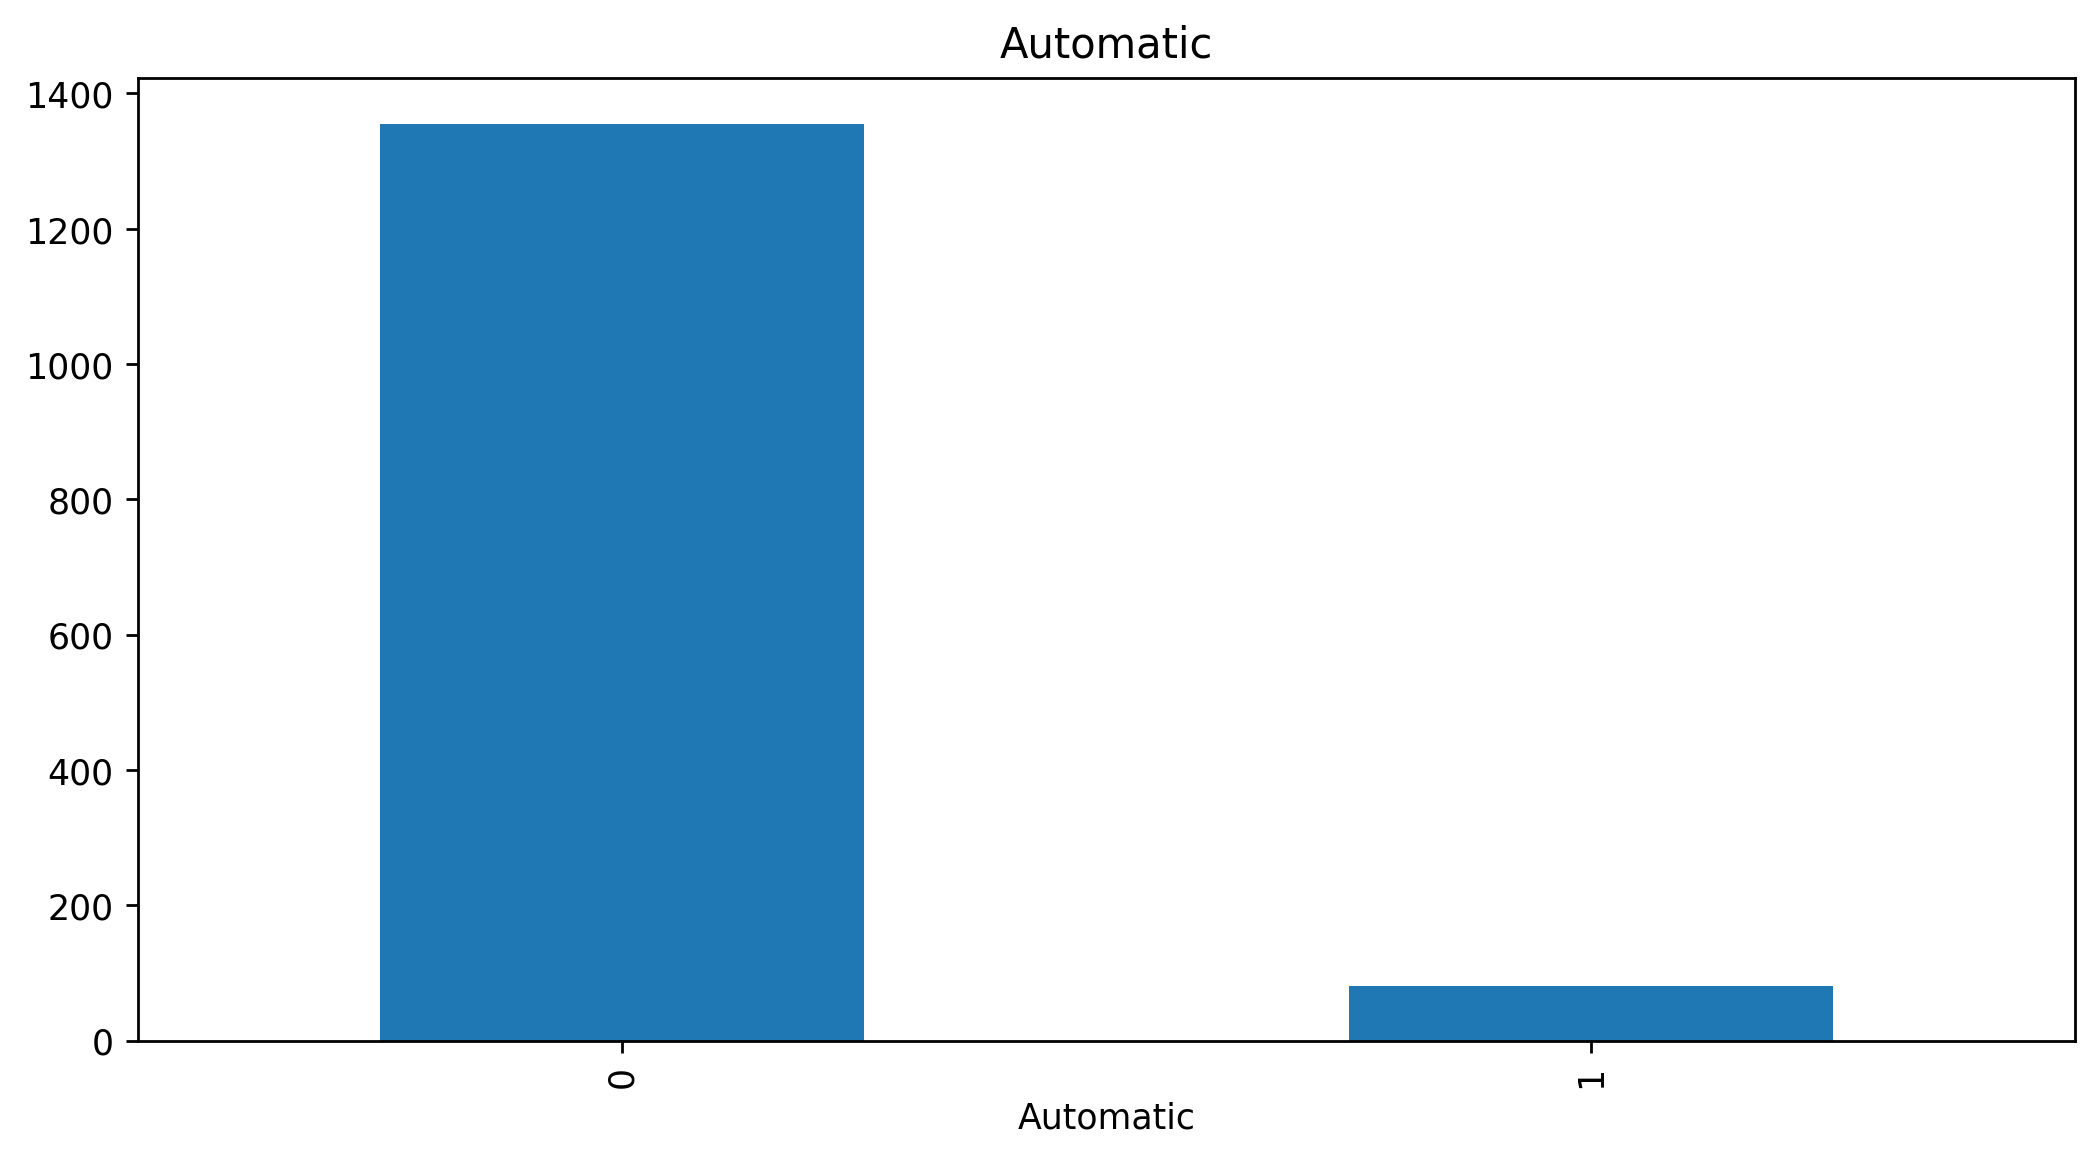

In [ ]:
data['Automatic'].value_counts().plot(kind='bar')
plt.title('Automatic')

Text(0.5, 1.0, 'Cylinders')

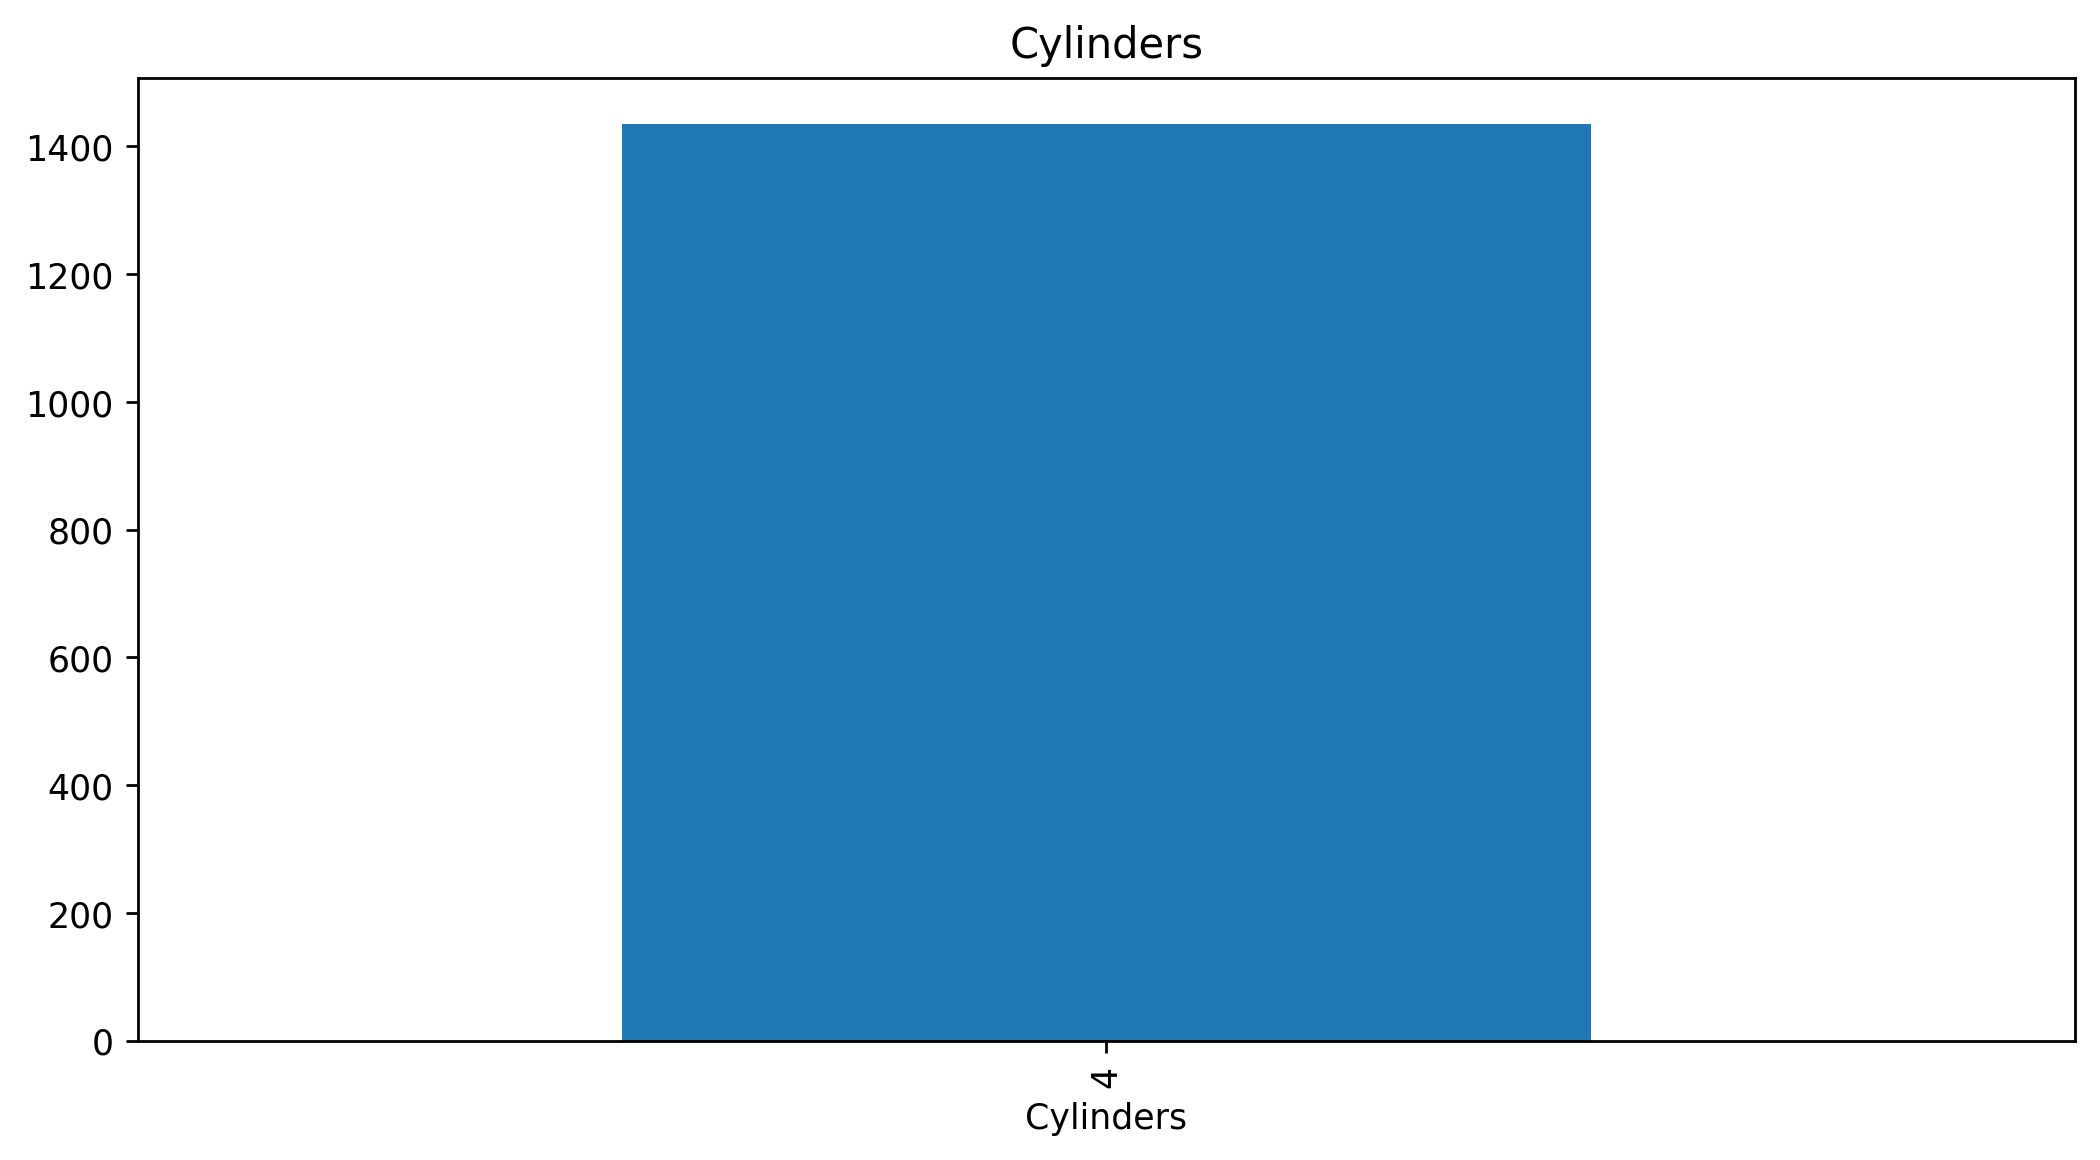

In [ ]:
data['Cylinders'].value_counts().plot(kind='bar')
plt.title('Cylinders')

In [ ]:
data['Cylinders'].unique()

array([4])

Text(0.5, 1.0, 'Gears')

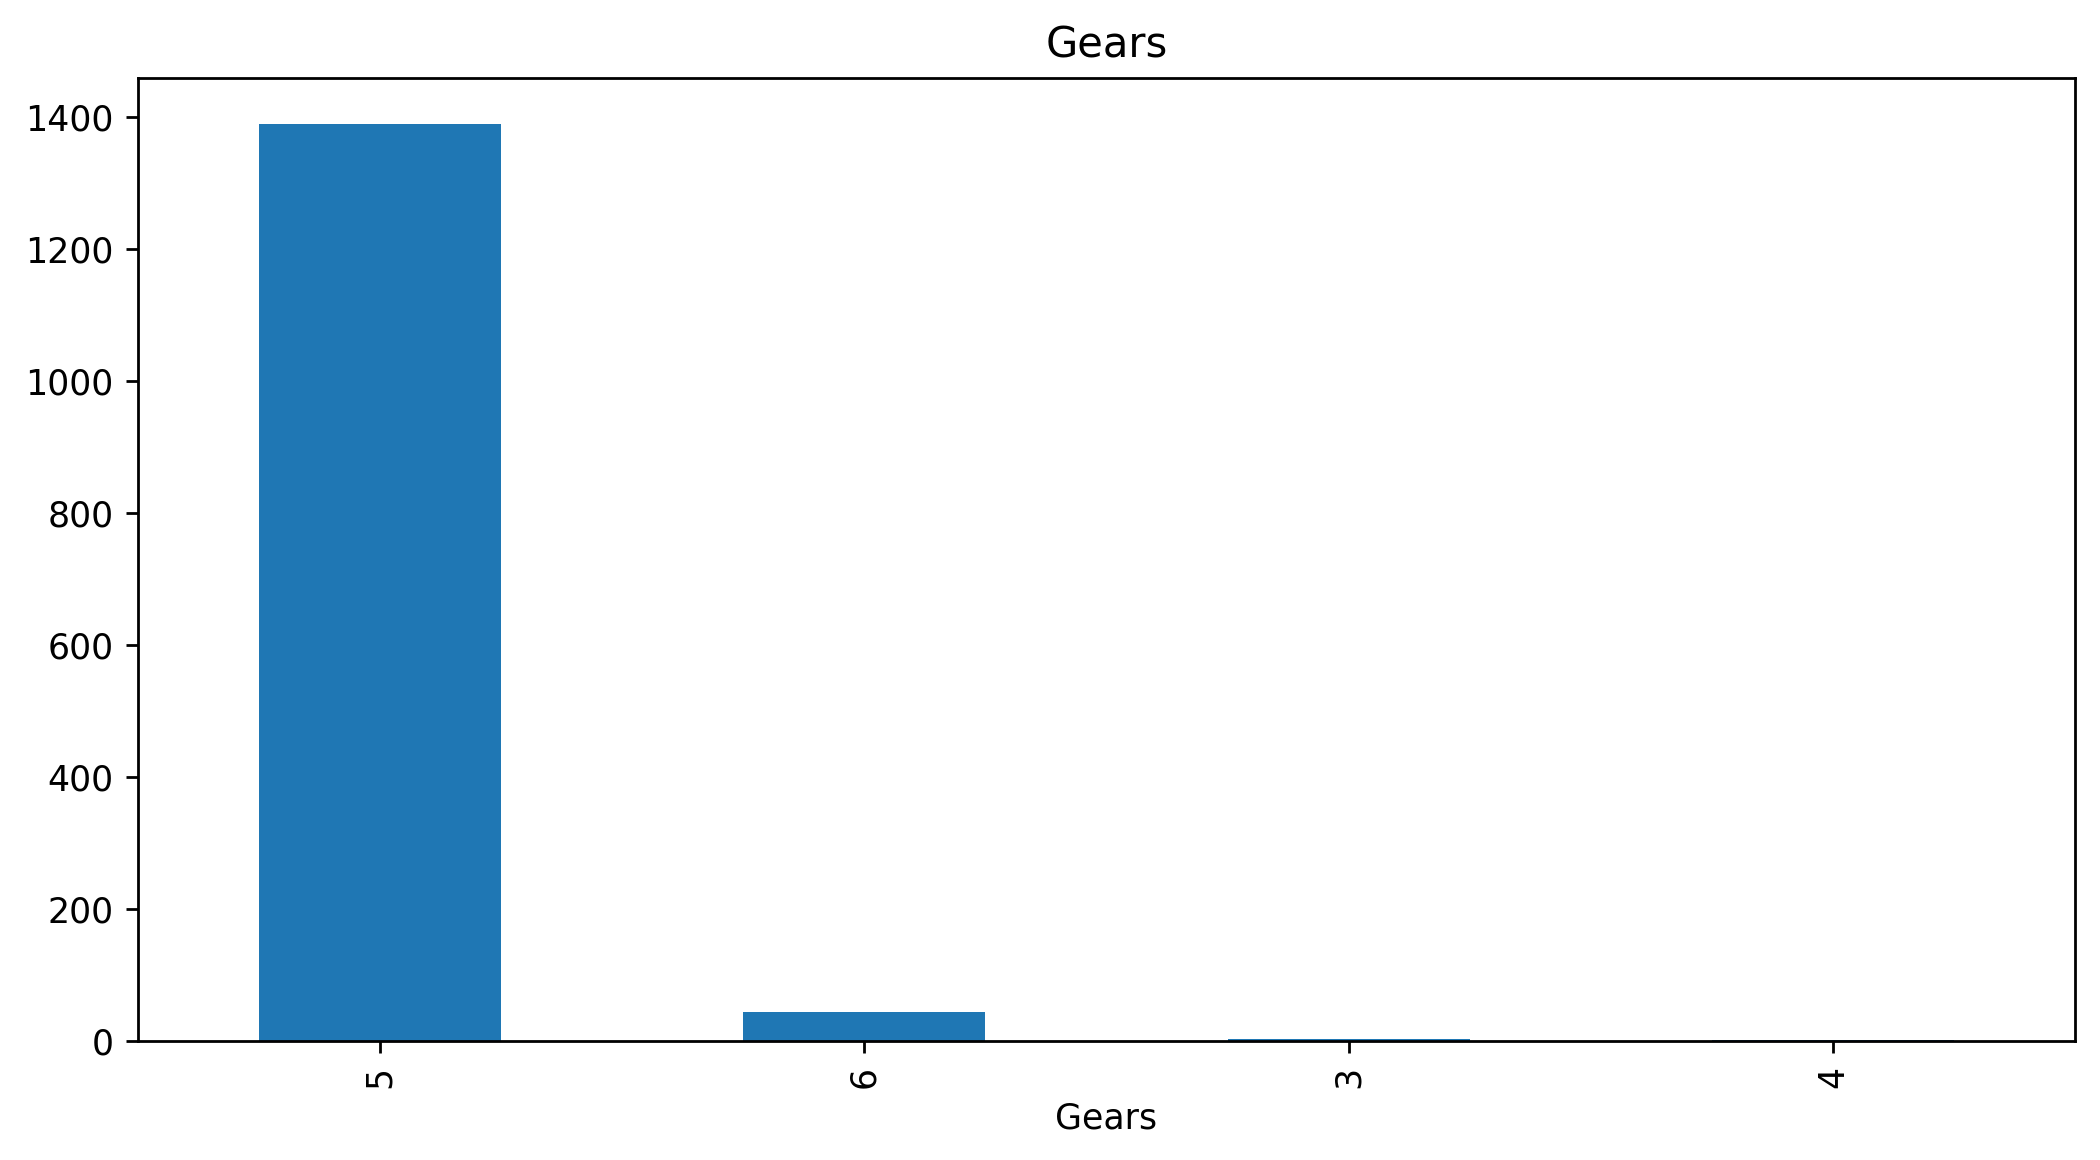

In [ ]:
data['Gears'].value_counts().plot(kind='bar')
plt.title('Gears')

In [ ]:
data['Gears'].unique()

array([5, 6, 3, 4])

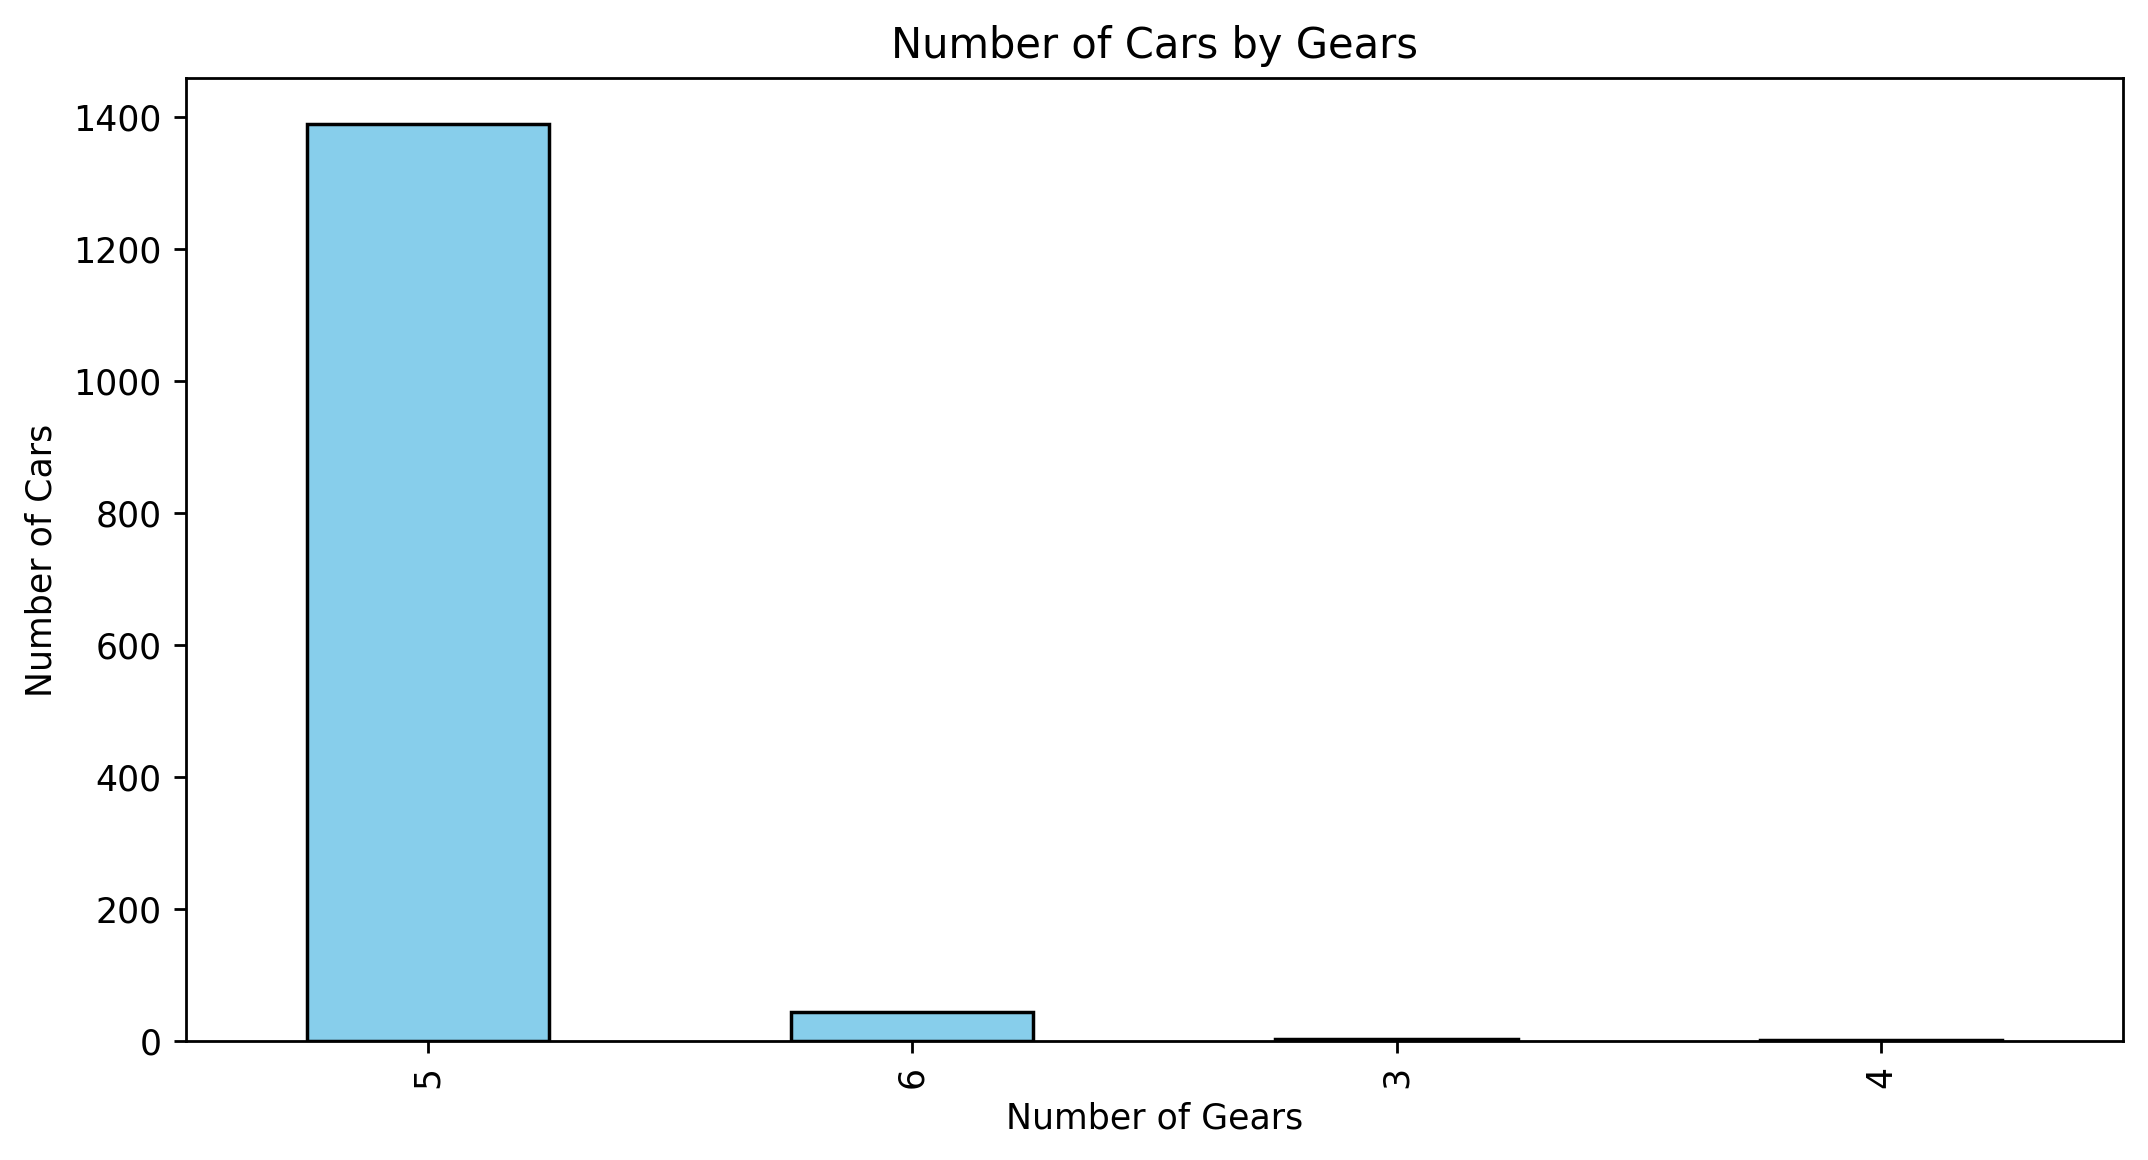

In [ ]:
import matplotlib.pyplot as plt

# Count the number of cars for each gear
data['Gears'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Number of Gears')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Gears')

# Show the plot
plt.show()


In [ ]:
six_gear_cars = data['Gears'].value_counts()[6]
print("Number of cars with 6 gears:", six_gear_cars)


Number of cars with 6 gears: 43


(array([147., 235., 282., 382.,  97., 141.,  79.,  10.,  18.,  11.,   4.,
          3.,  13.,   6.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   4.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1000. , 1020.5, 1041. , 1061.5, 1082. , 1102.5, 1123. , 1143.5,
        1164. , 1184.5, 1205. , 1225.5, 1246. , 1266.5, 1287. , 1307.5,
        1328. , 1348.5, 1369. , 1389.5, 1410. , 1430.5, 1451. , 1471.5,
        1492. , 1512.5, 1533. , 1553.5, 1574. , 1594.5, 1615. ]),
 <BarContainer object of 30 artists>)

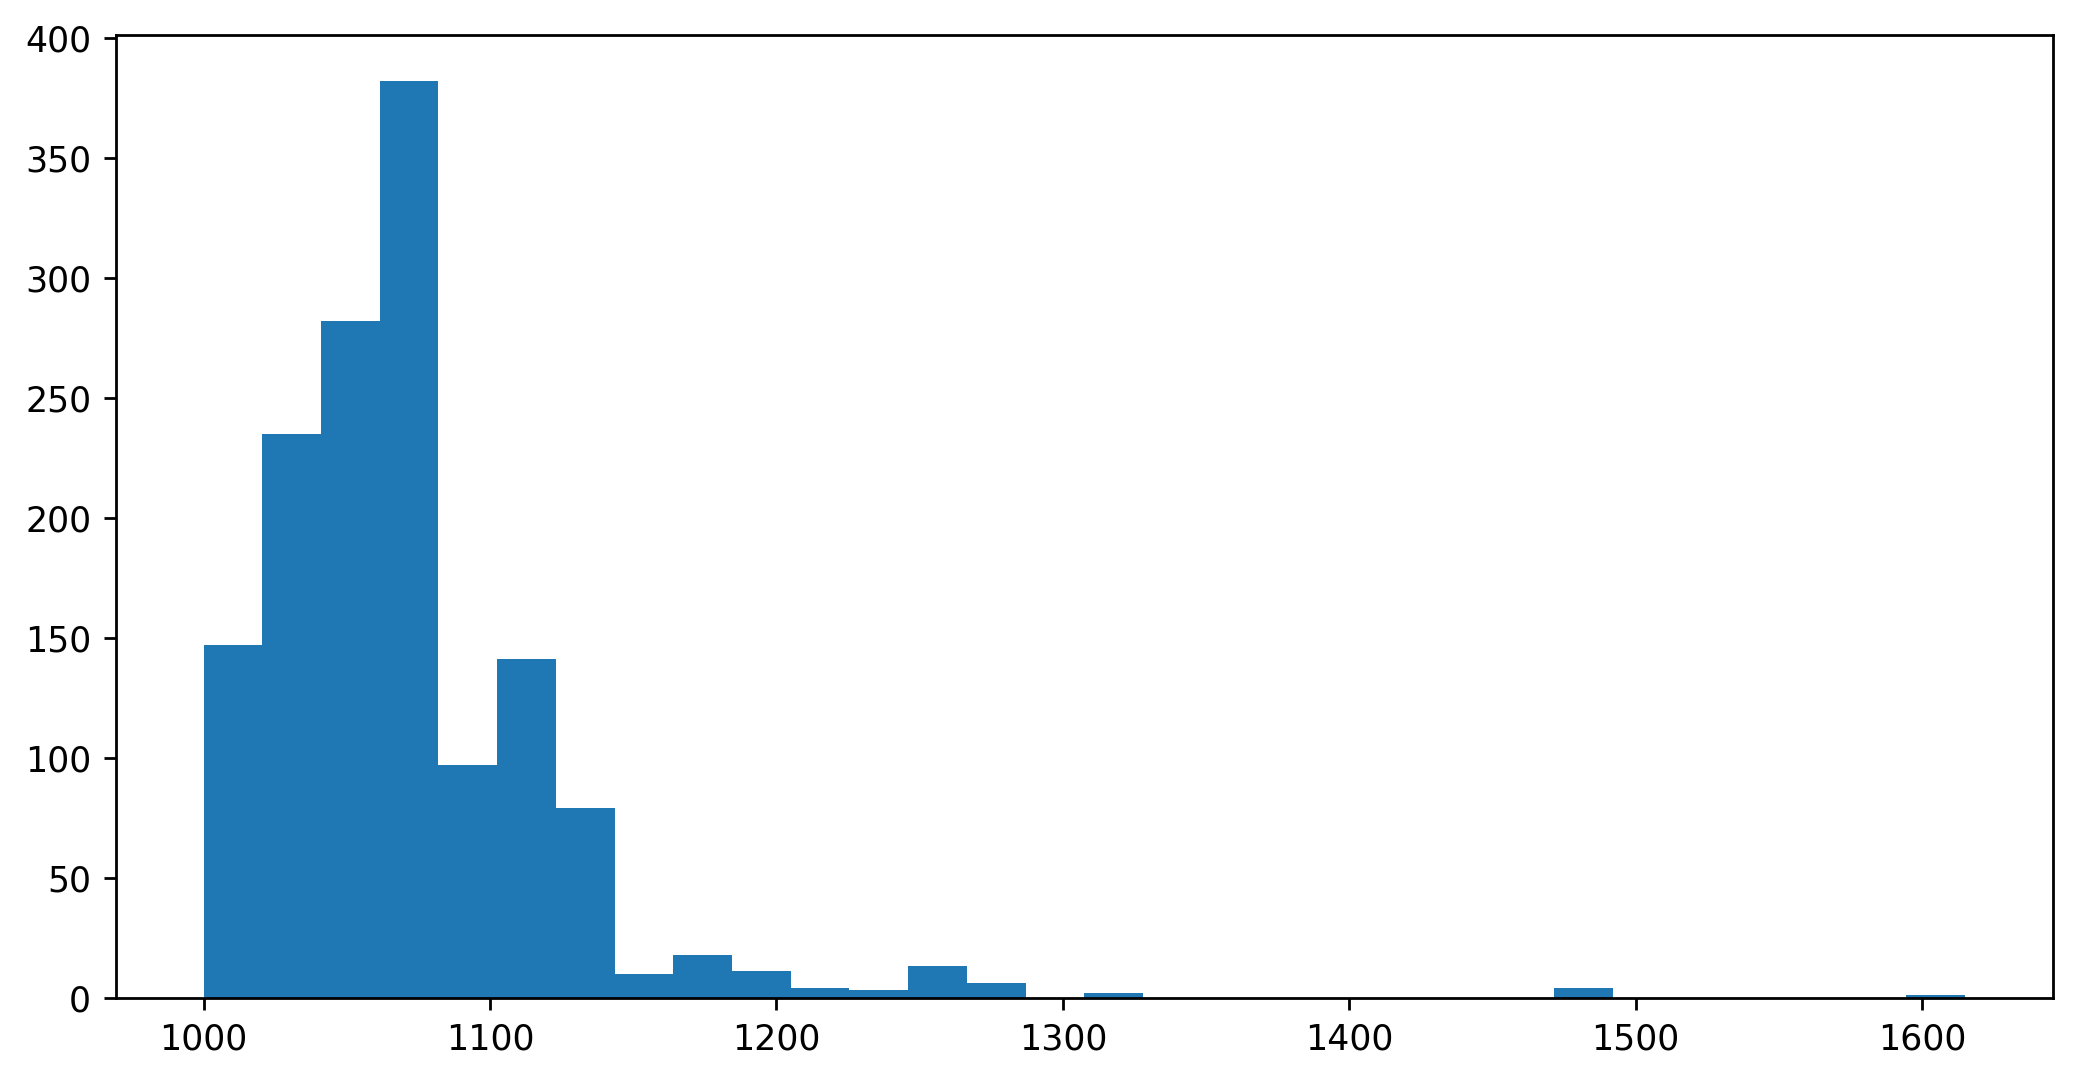

In [ ]:
plt.hist(data['Weight'],bins=30)

In [ ]:
data

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


<Axes: >

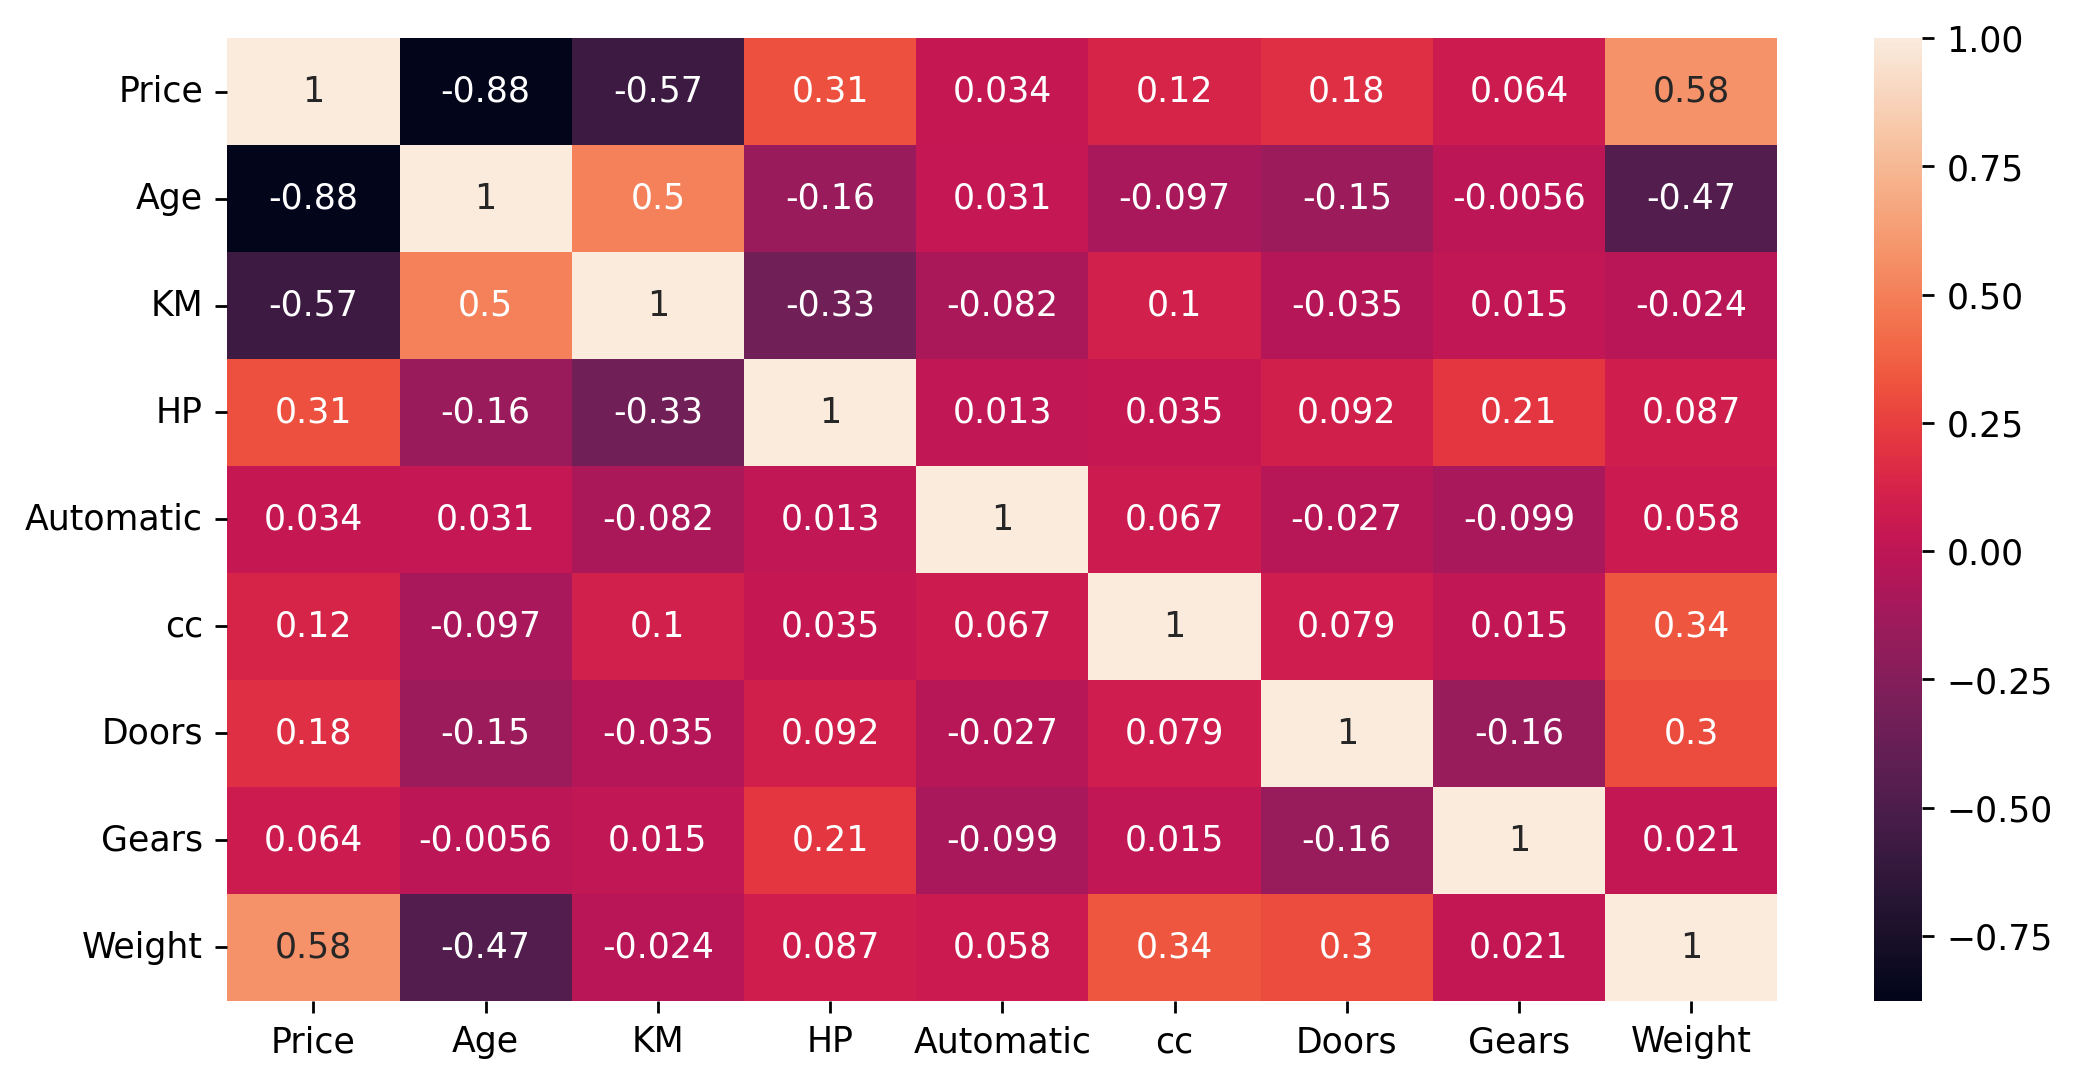

In [ ]:
sns.heatmap(data.drop(["Fuel_Type","Cylinders"],axis = 1).corr(),annot=True)

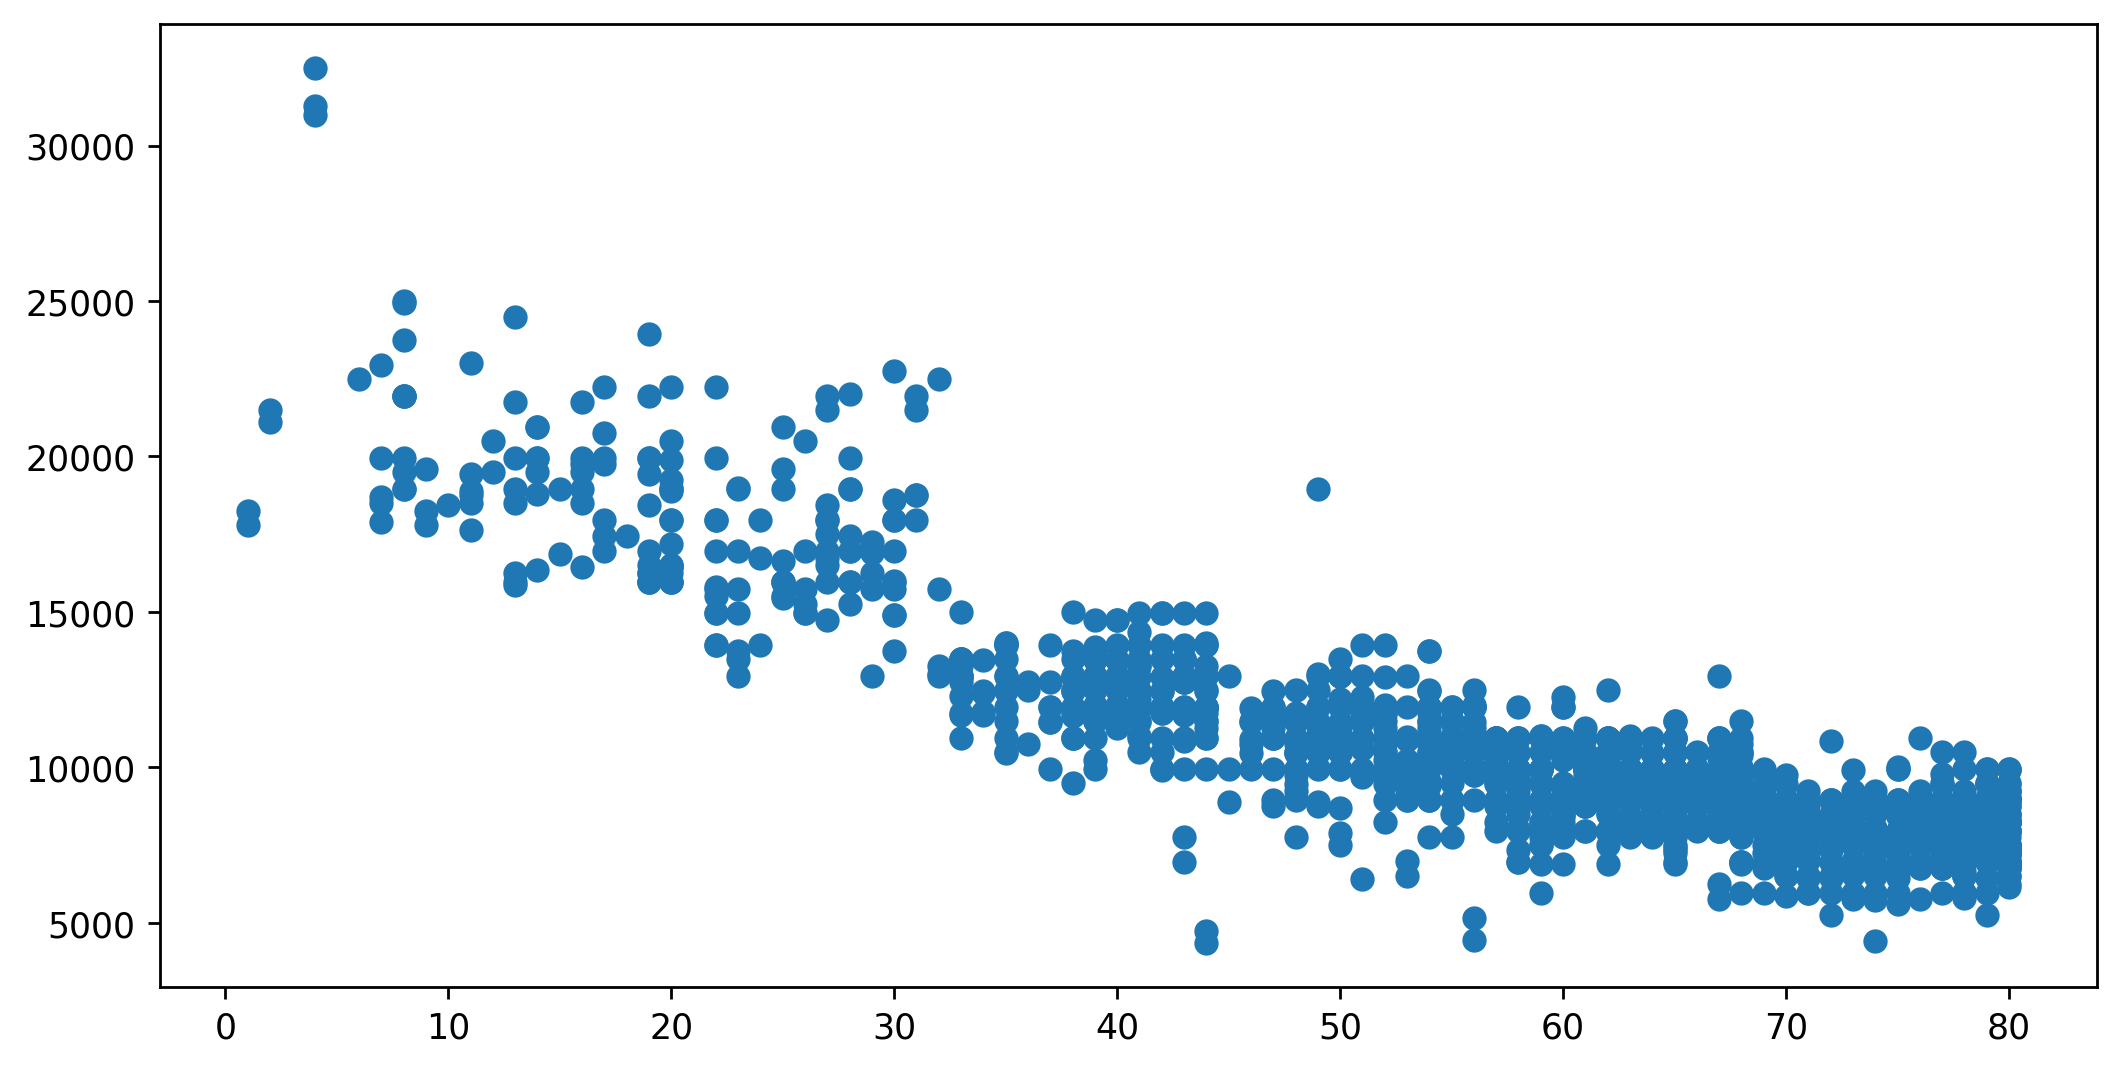

In [ ]:
plt.scatter(x=data['Age'],y=data['Price'])

In [ ]:
data['HP'].unique()

array([ 90, 192,  69, 110,  97,  71, 116,  98,  86,  72, 107,  73])

<Axes: >

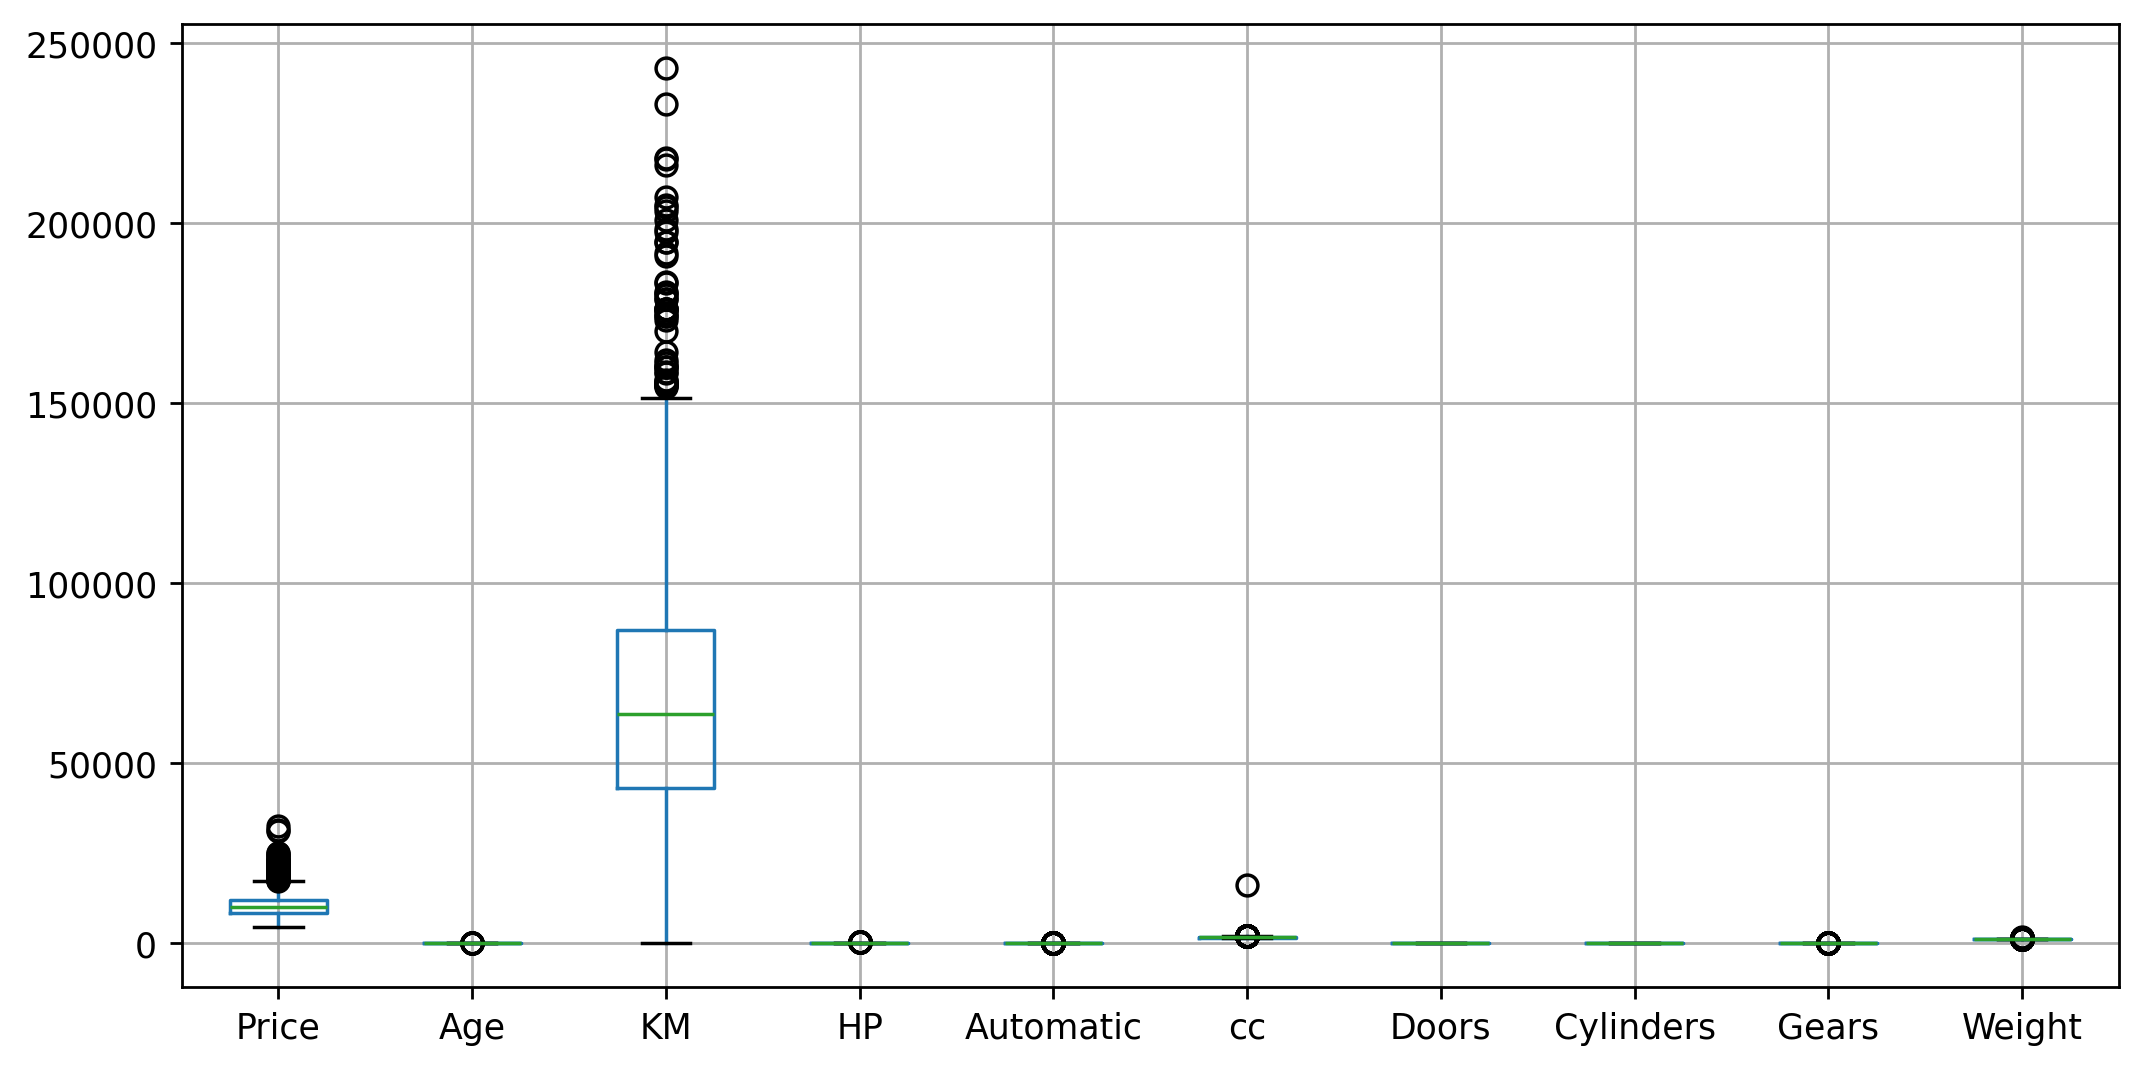

In [ ]:
data.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d8a64744d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7d8a64746190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d8a64744490>],
 'medians': [<matplotlib.lines.Line2D at 0x7d8a647472d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d8a64747b90>],
 'means': []}

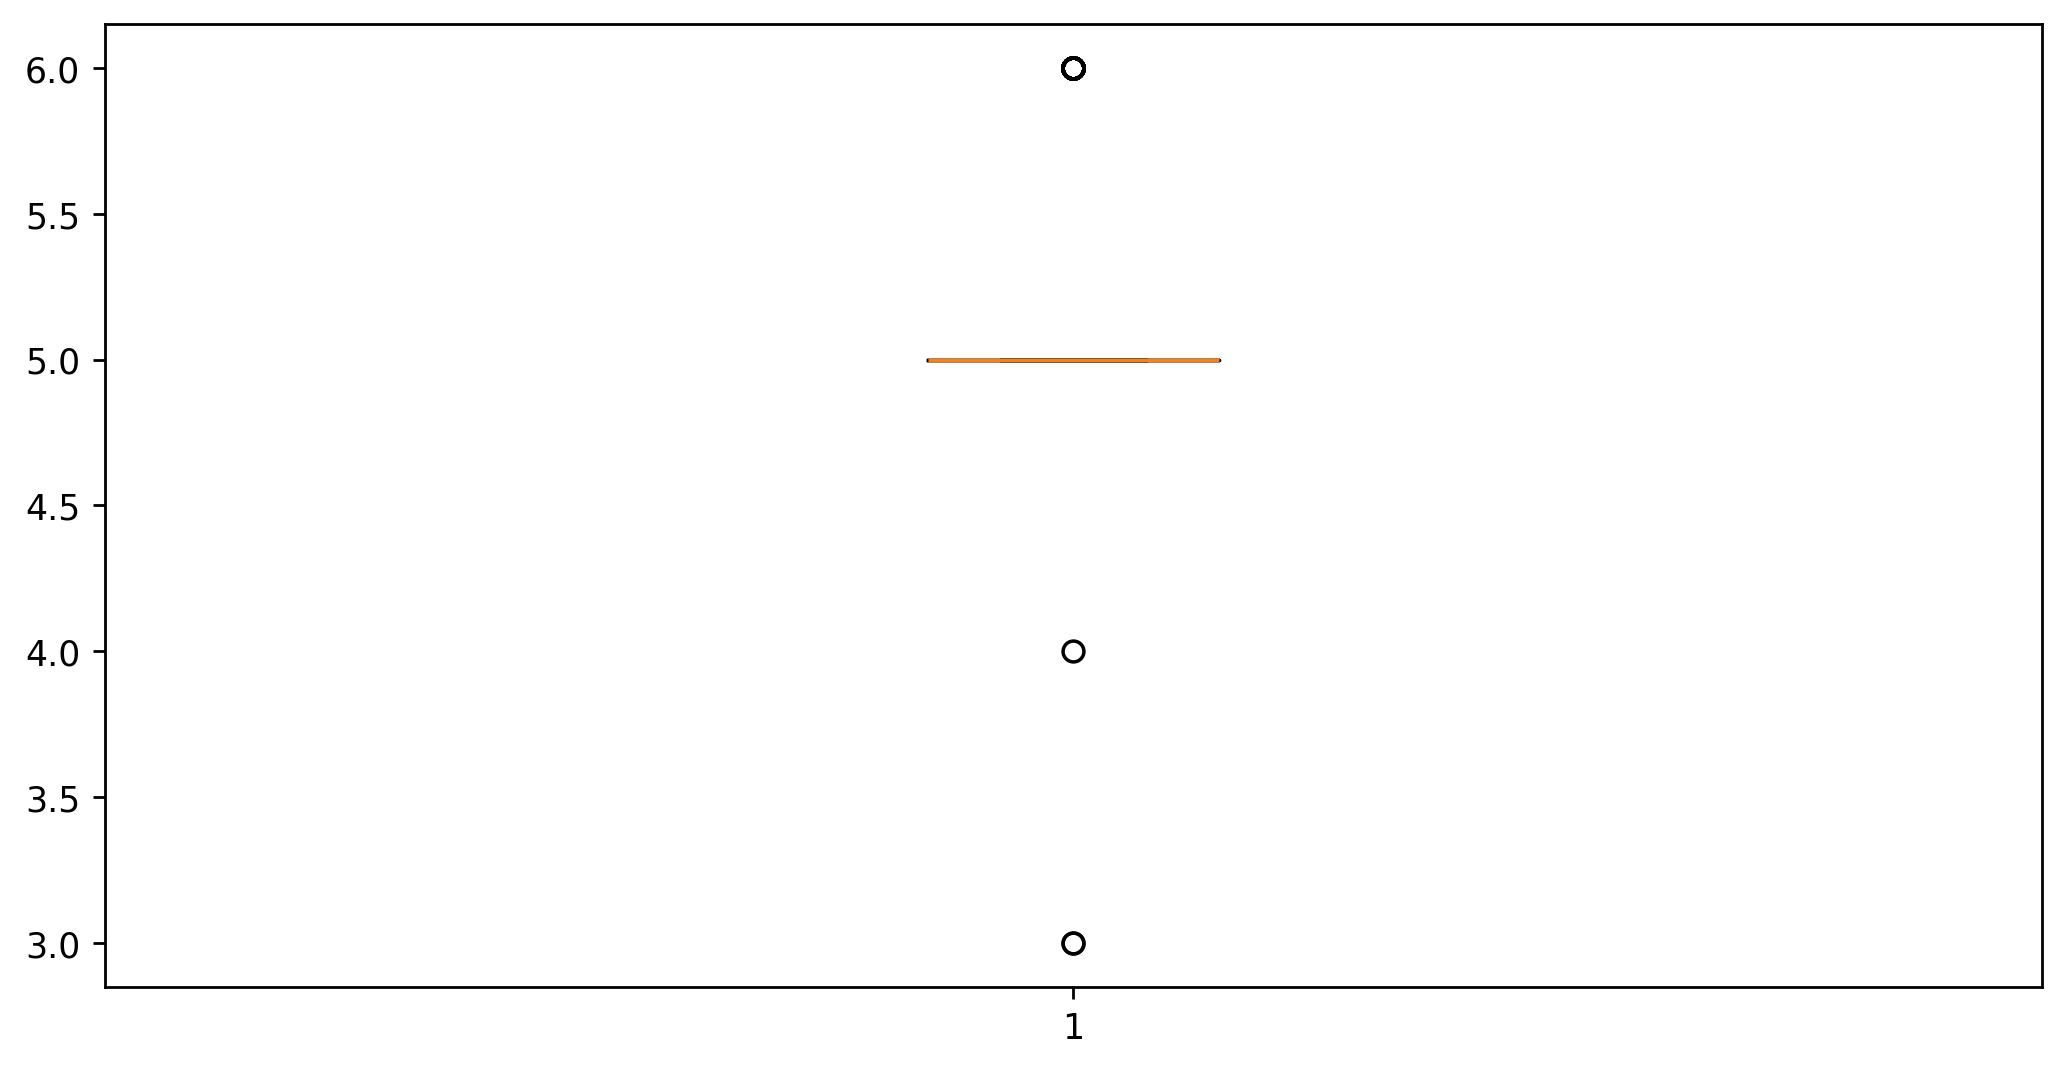

In [ ]:
plt.boxplot(data['Gears'])

In [ ]:
data['Gears'].max()

6

In [ ]:
data['Gears'].min()

3

In [ ]:
def capping(data,columns):
  for column in columns:
    Q1=data[column].quantile(0.25)
    Q3=data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR
    upper_limit=Q3+1.5*IQR
    data.loc[:,column] = data[column].clip(lower=lower_limit,upper=upper_limit)


In [ ]:
capping(data,['Weight'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7d8a647b5990>,
 'caps': [<matplotlib.lines.Line2D at 0x7d8a647b7110>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d8a647b4f10>],
 'medians': [<matplotlib.lines.Line2D at 0x7d8a647c0650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d8a647c1110>],
 'means': []}

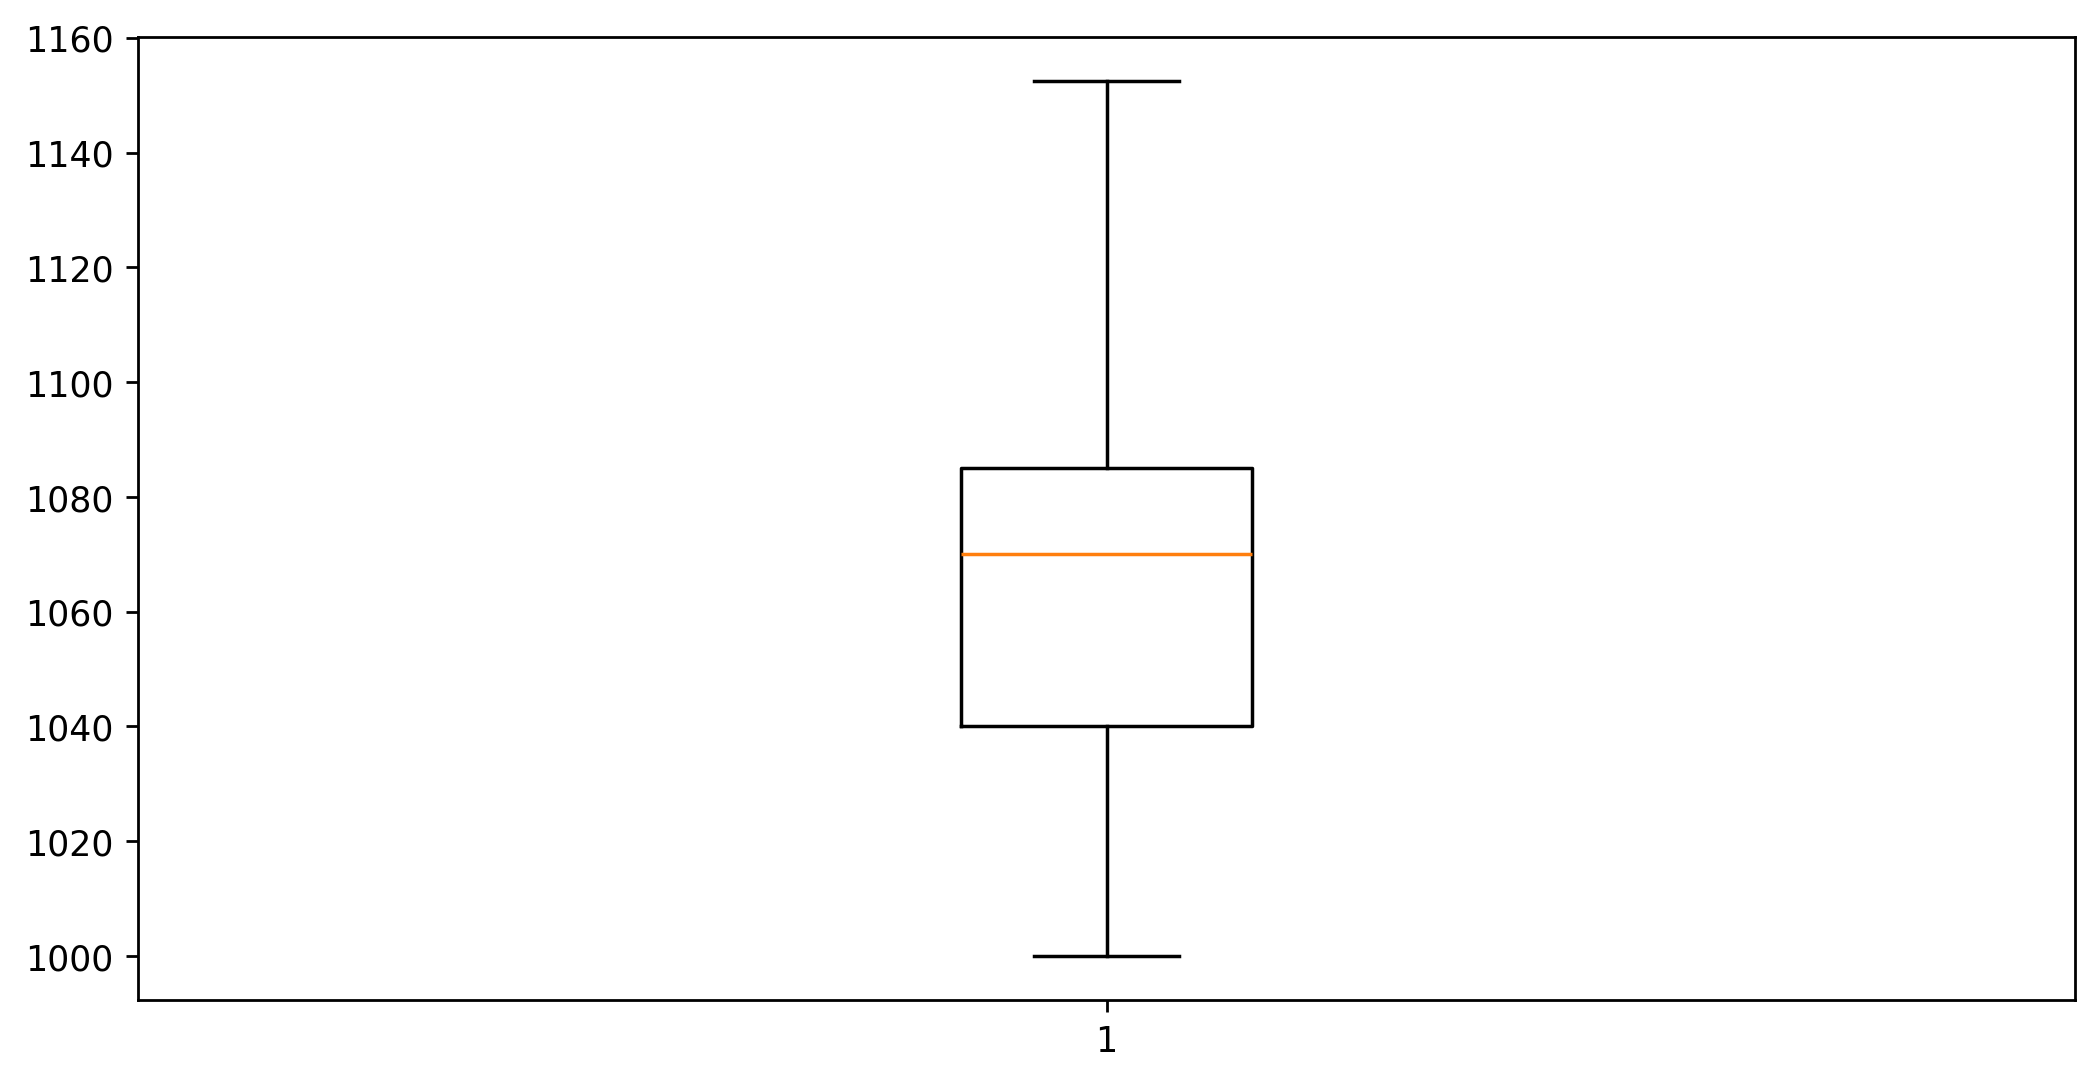

In [ ]:
plt.boxplot(data['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d8a6481f5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d8a64824d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d8a6481ead0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d8a64826450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d8a64826ed0>],
 'means': []}

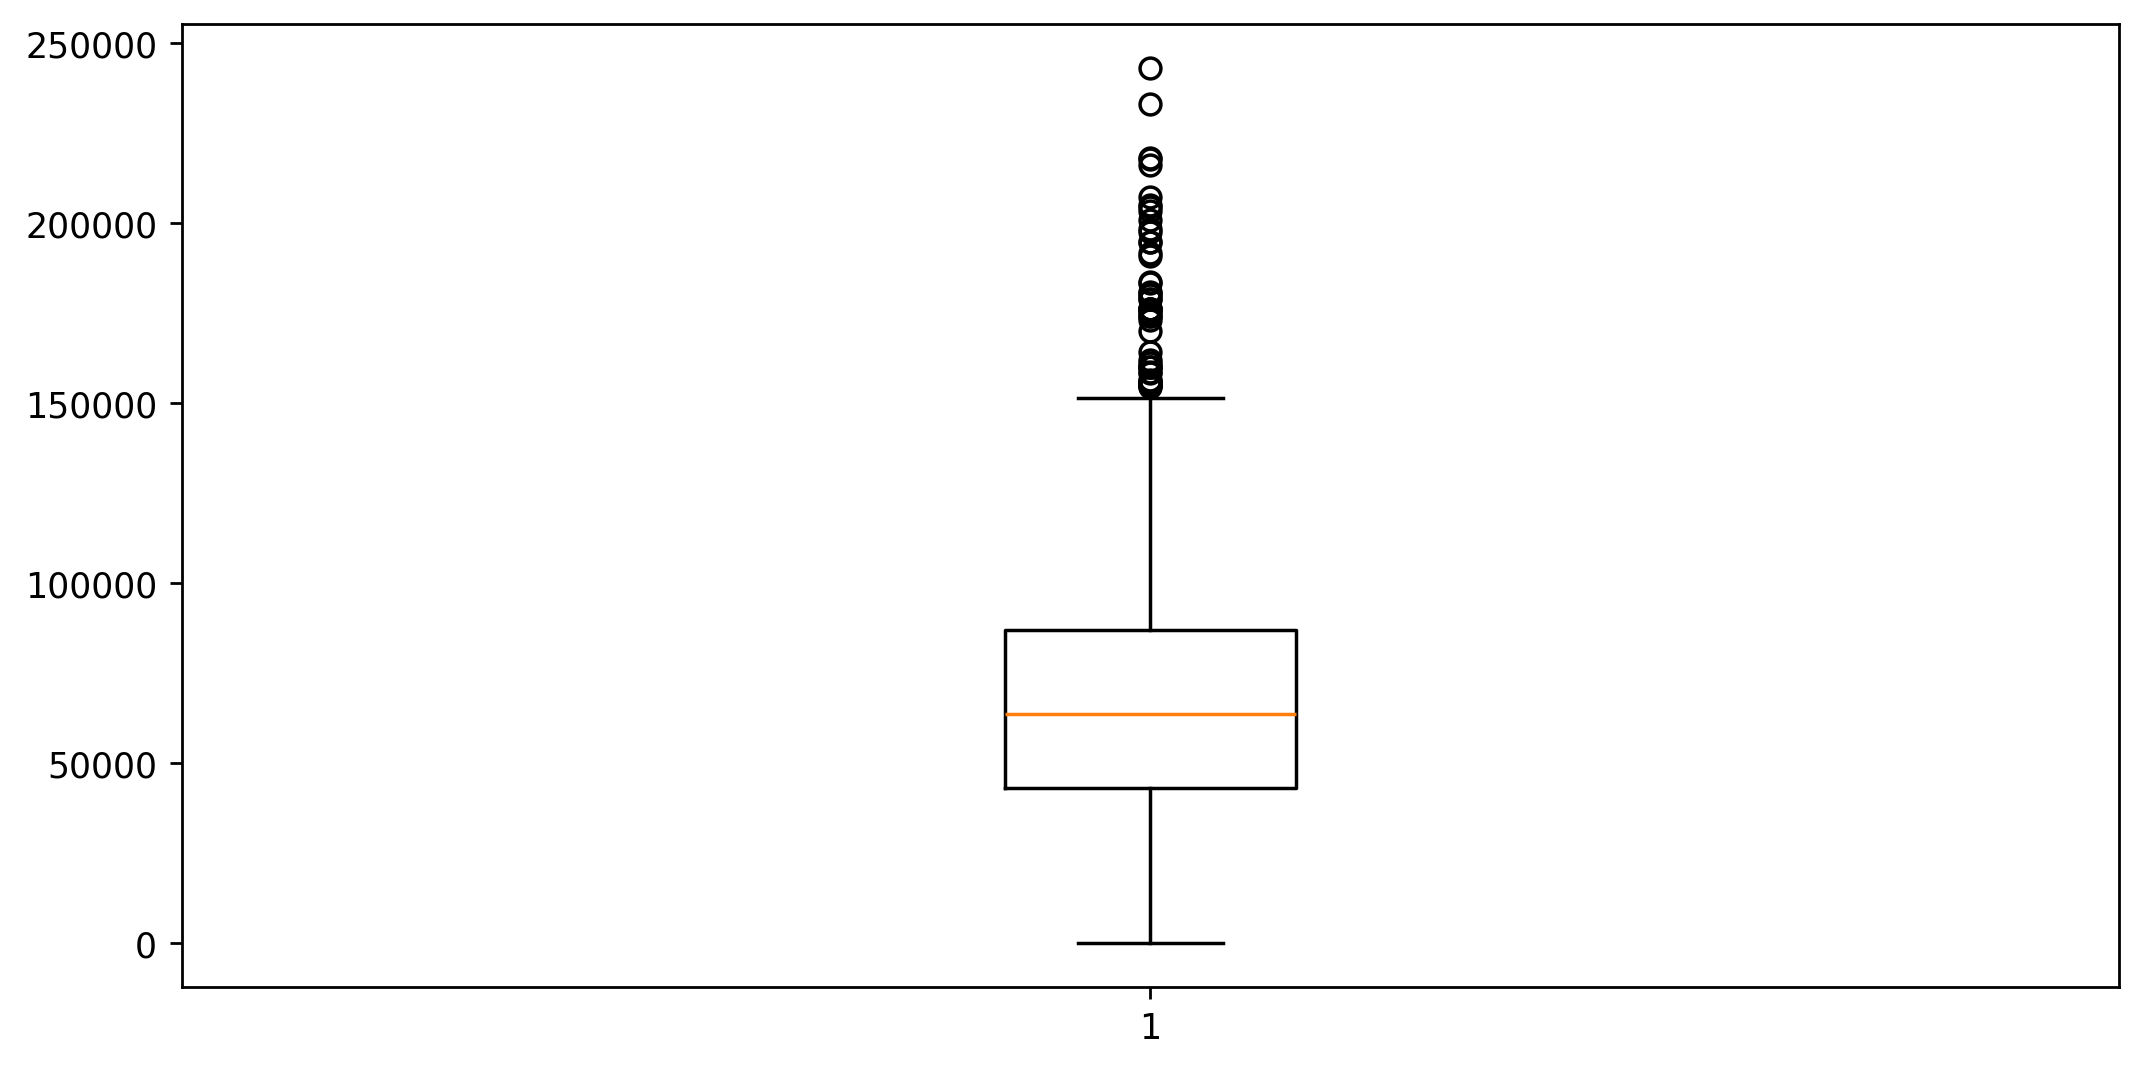

In [ ]:
plt.boxplot(data['KM'])

In [ ]:
capping(data,['KM'])

In [ ]:
capping(data,['Price','Age','KM','HP','cc','Doors','Weight'])

<Axes: >

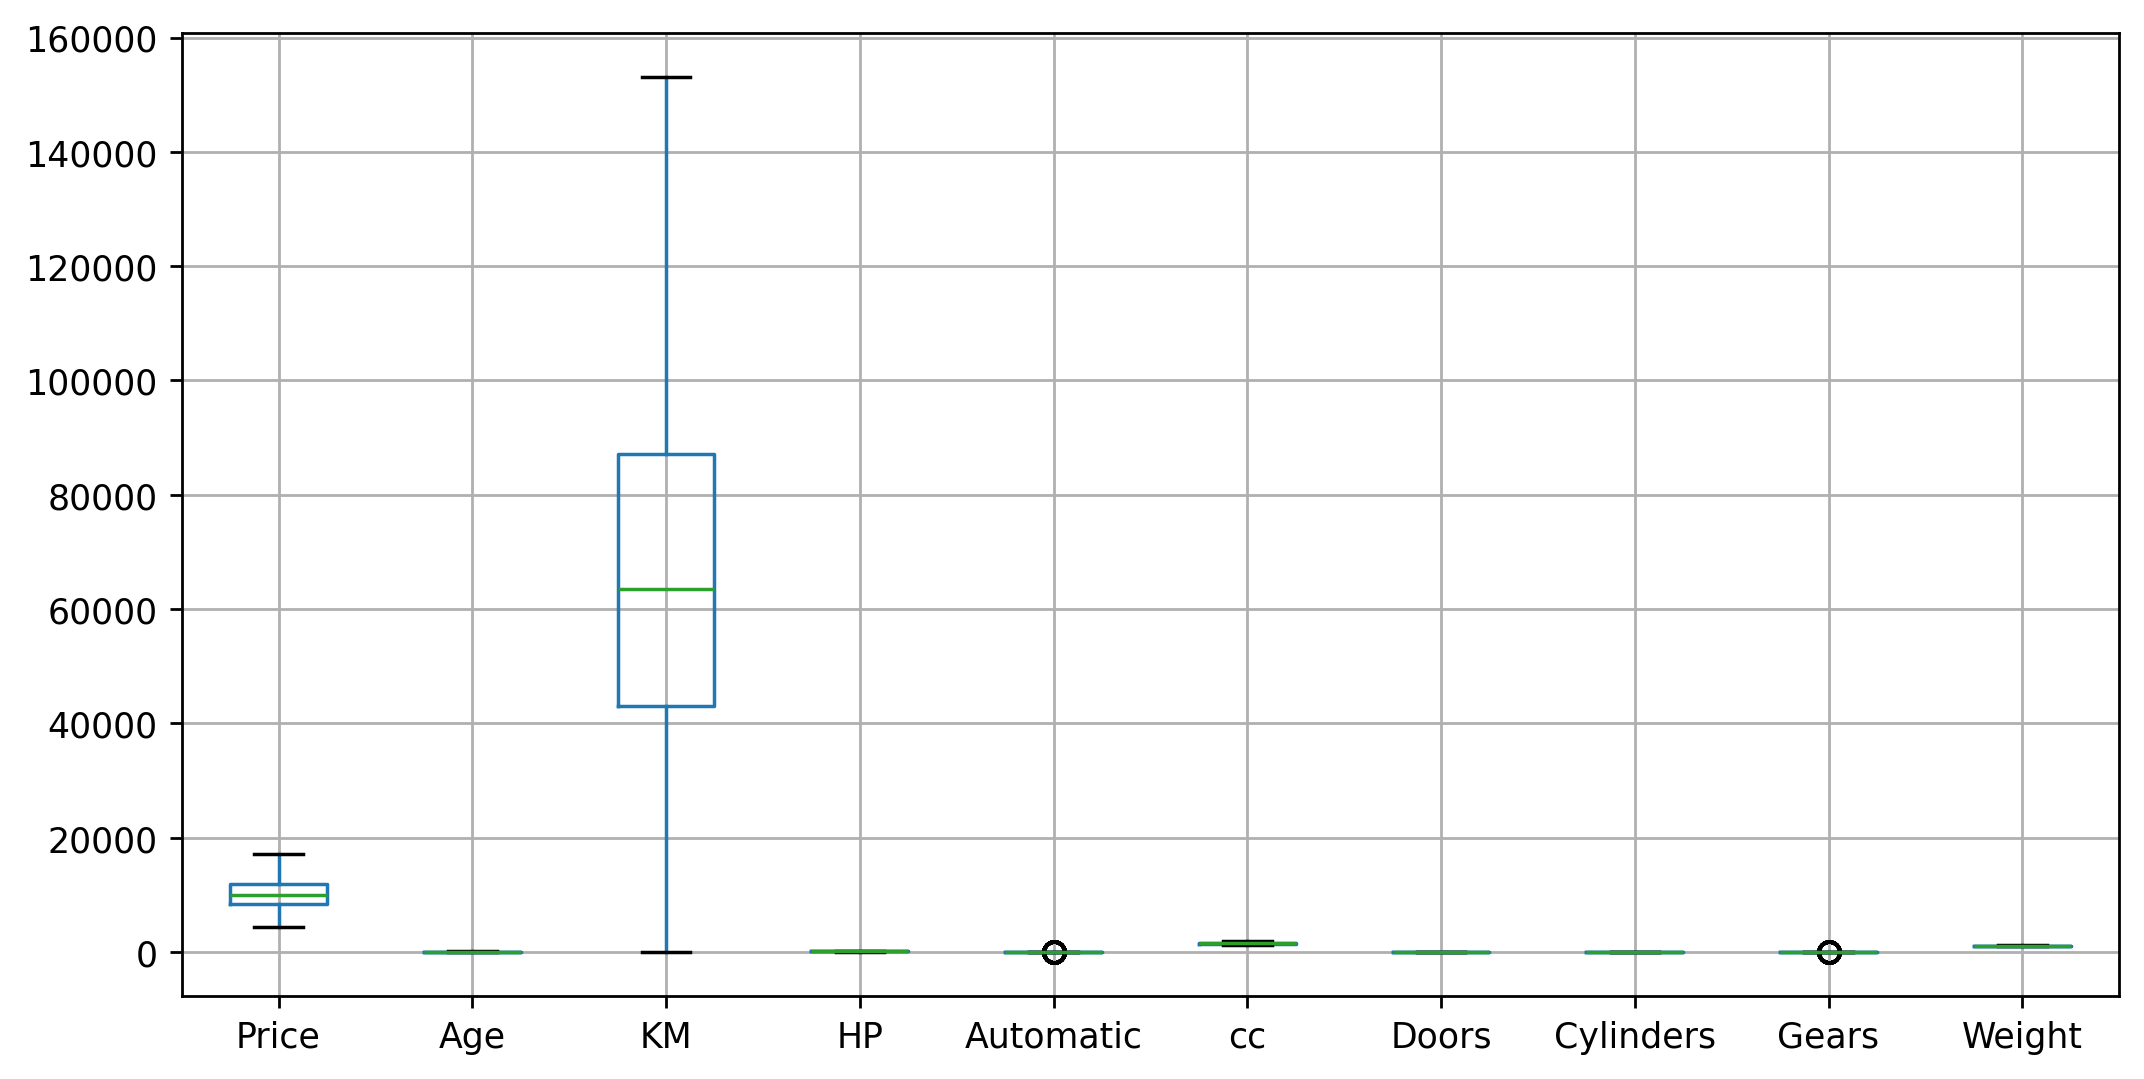

In [ ]:
data.boxplot()

In [ ]:
data['cc'].unique()

array([1900, 1800, 1600, 1400, 1598, 1398, 1300, 1587, 1332])

In [ ]:
capping(data,['cc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d8a645c6310>,
 'caps': [<matplotlib.lines.Line2D at 0x7d8a645c7650>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d8a645c5a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7d8a645d09d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d8a645d1290>],
 'means': []}

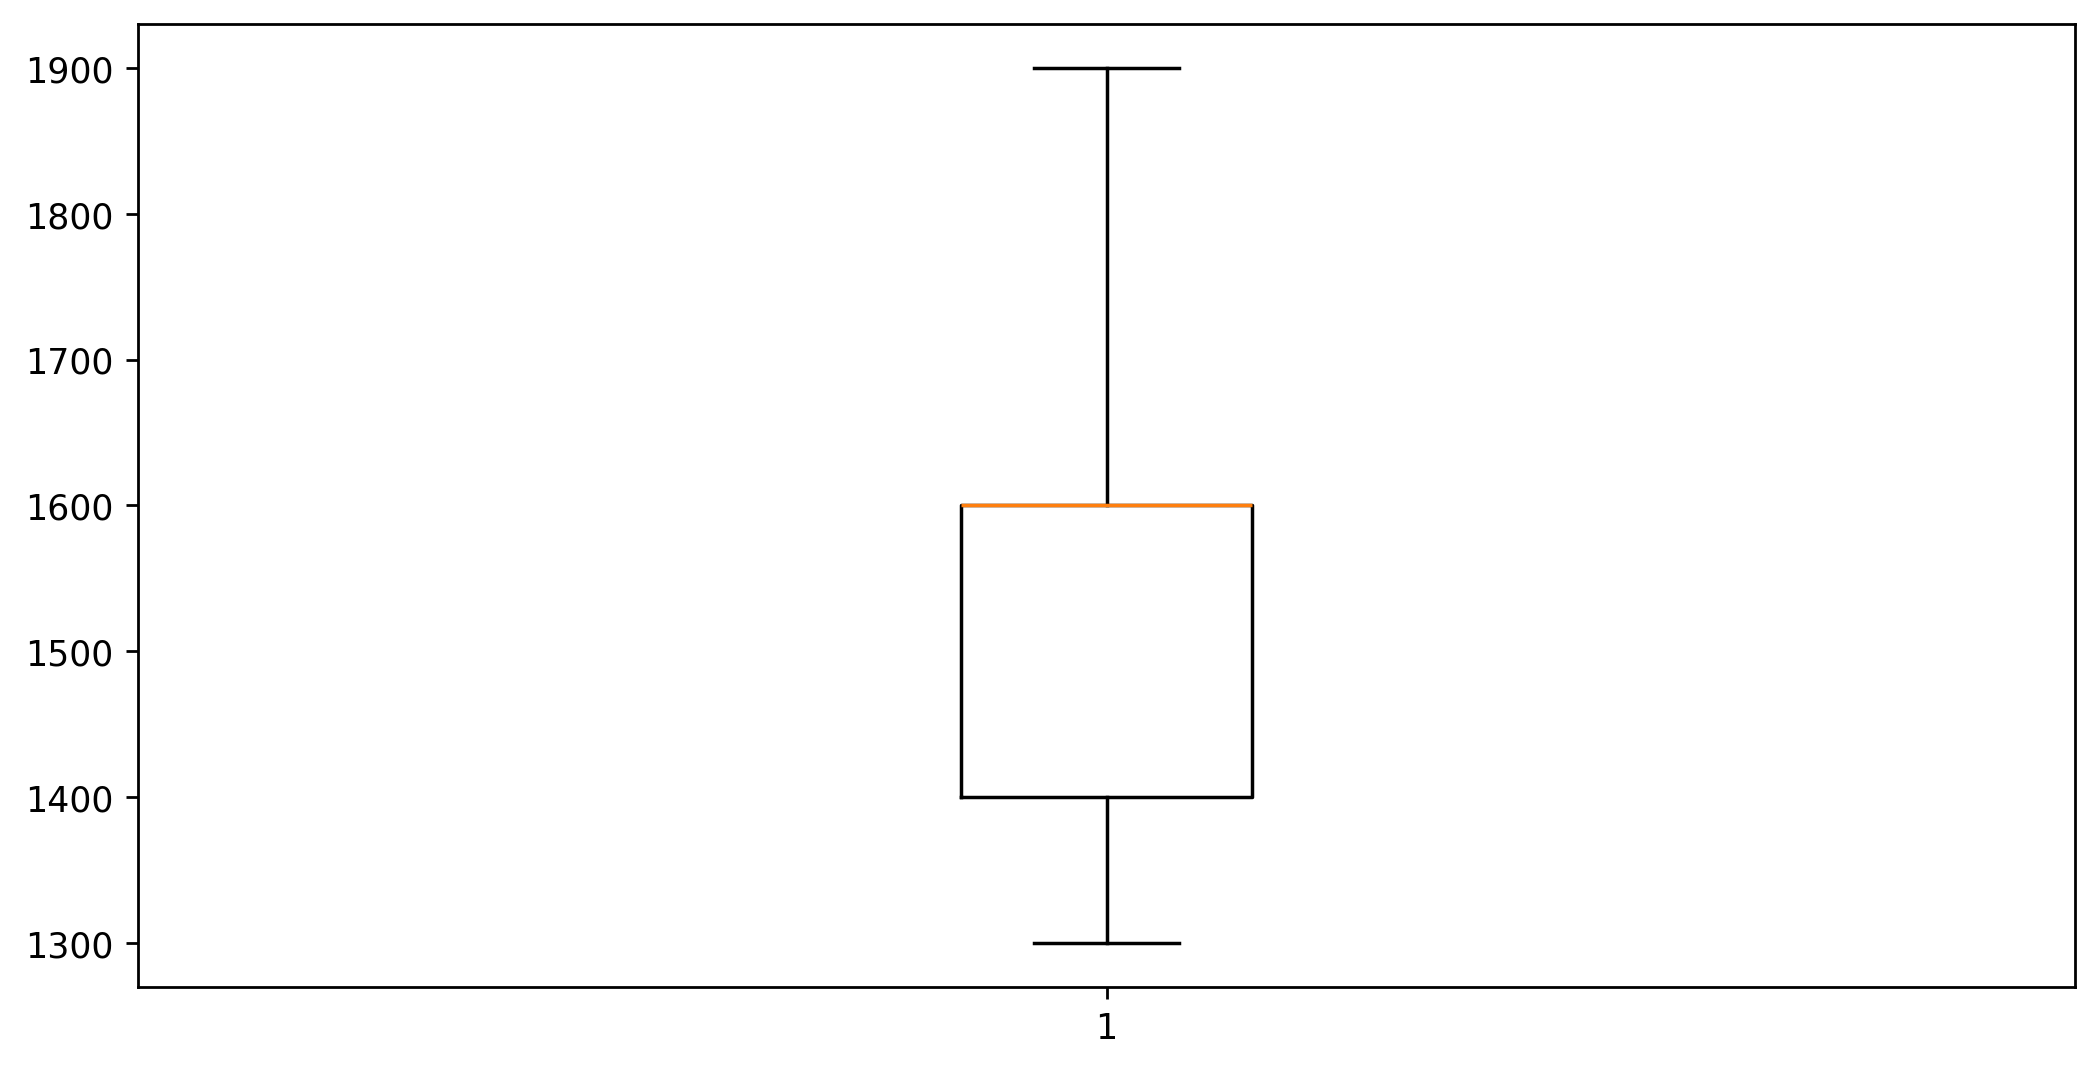

In [ ]:
plt.boxplot(data['cc'])

In [ ]:
data.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.055749,1558.327526,4.032753,4.0,5.026481,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,0.229517,168.788311,0.952667,0.0,0.188575,37.722708
min,4350.000000,5.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,1.000000,1900.000000,5.000000,4.0,6.000000,1152.500000


**remove Multicolinearlity**

<Axes: >

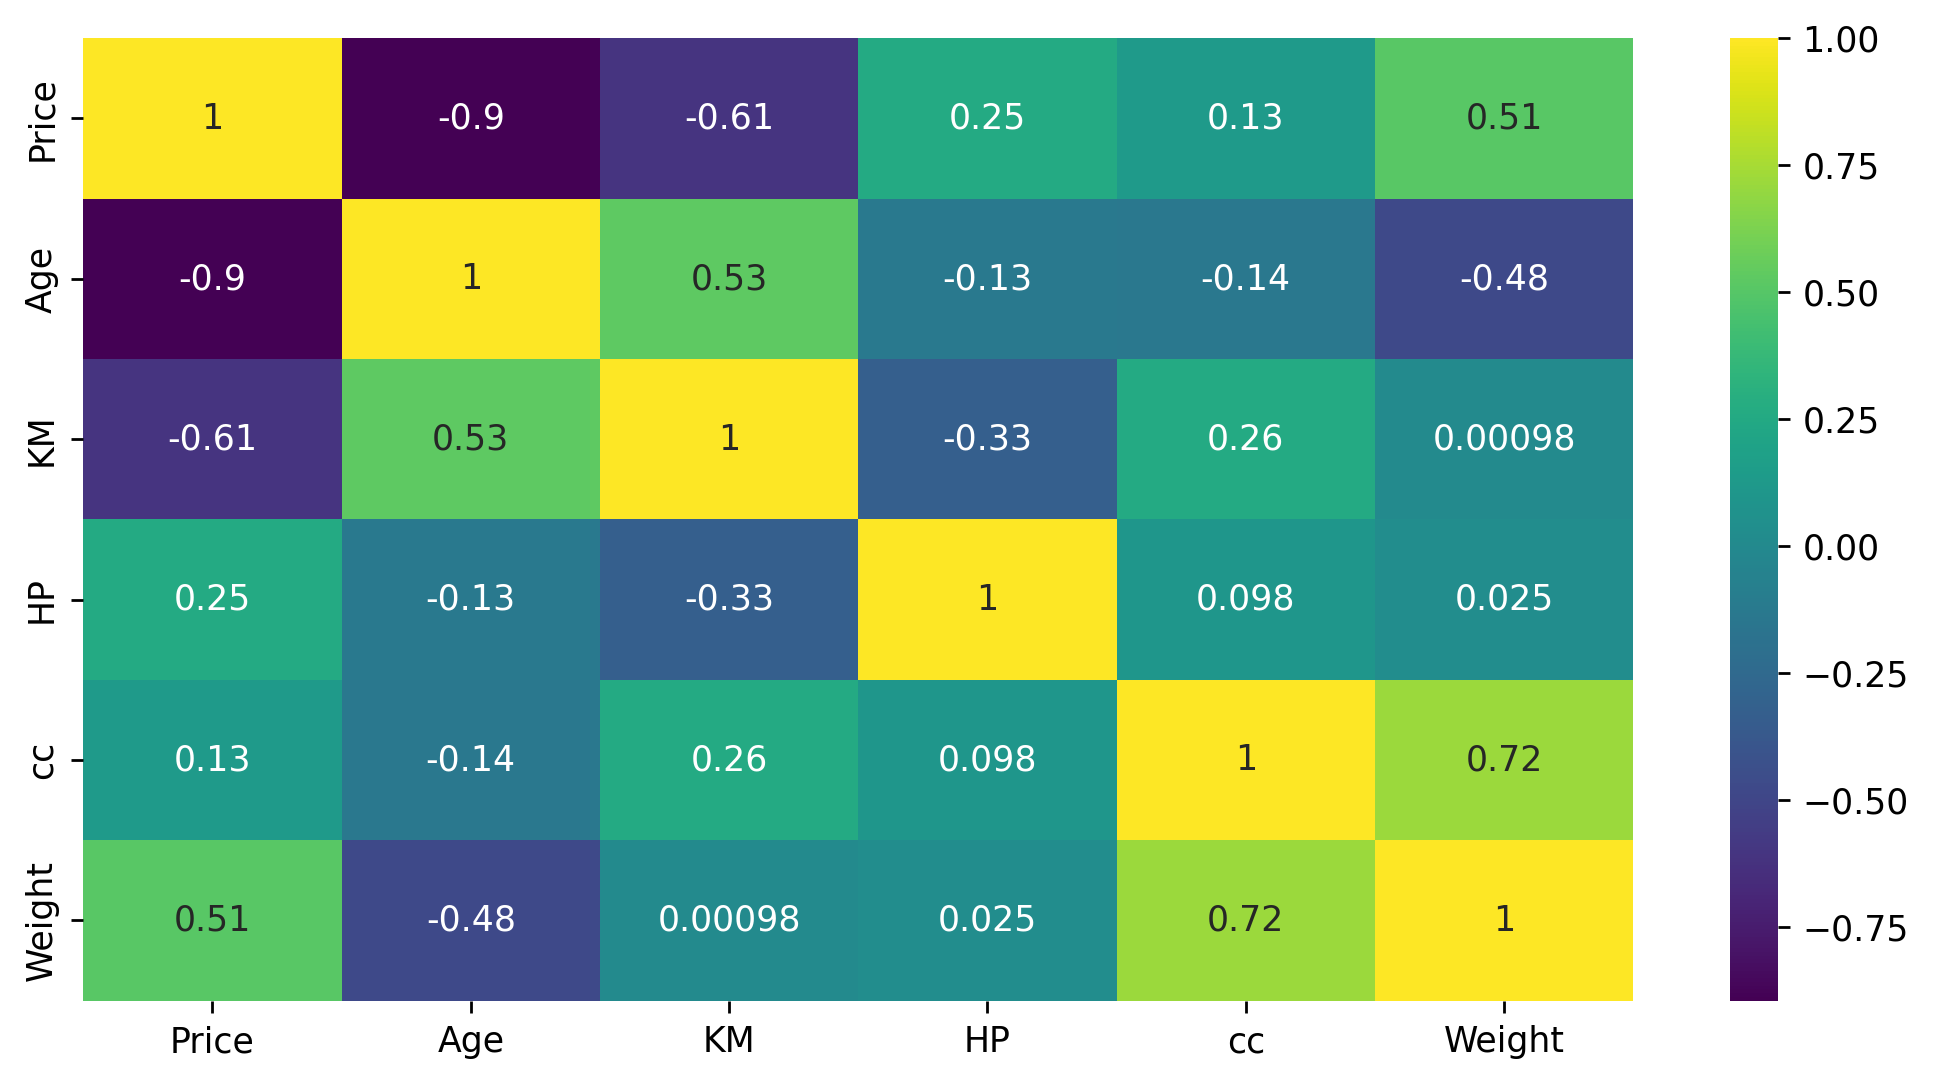

In [ ]:
sns.heatmap(data.drop(["Fuel_Type","Cylinders",'Doors','Gears','Automatic'],axis = 1).corr(),annot=True,cmap='viridis')

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

categorical_coloums=["Fuel_Type","Cylinders",'Gears','Automatic','cc','Weight','HP','Doors']

X=data.drop(columns=categorical_coloums)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print(vif_data)


  Feature       VIF
0   Price  3.340359
1     Age  8.587965
2      KM  6.584705


In [ ]:
data.drop(columns=['Weight','HP','cc'],axis=1,inplace=True)

In [ ]:
data

,Price,Age,KM,Fuel_Type,Automatic,Doors,Cylinders,Gears
0,13500,23,46986.0,Diesel,0,3,4,5
1,13750,23,72937.0,Diesel,0,3,4,5
2,13950,24,41711.0,Diesel,0,3,4,5
3,14950,26,48000.0,Diesel,0,3,4,5
4,13750,30,38500.0,Diesel,0,3,4,5
...,...,...,...,...,...,...,...,...
1431,7500,69,20544.0,Petrol,0,3,4,5
1432,10845,72,19000.0,Petrol,0,3,4,5
1433,8500,71,17016.0,Petrol,0,3,4,5
1434,7250,70,16916.0,Petrol,0,3,4,5


In [ ]:
OHE=pd.get_dummies(data, columns=['Fuel_Type']).astype(int)

In [ ]:
OHE

,Price,Age,KM,Automatic,Doors,Cylinders,Gears,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,0,3,4,5,0,1,0
1,13750,23,72937,0,3,4,5,0,1,0
2,13950,24,41711,0,3,4,5,0,1,0
3,14950,26,48000,0,3,4,5,0,1,0
4,13750,30,38500,0,3,4,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,0,3,4,5,0,0,1
1432,10845,72,19000,0,3,4,5,0,0,1
1433,8500,71,17016,0,3,4,5,0,0,1
1434,7250,70,16916,0,3,4,5,0,0,1


In [ ]:
sc = StandardScaler()
column=['Age','KM']
OHE[column]=sc.fit_transform(OHE[column])

In [ ]:
OHE[column]

,Age,KM
0,-1.781129,-0.595119
1,-1.781129,0.152464
2,-1.727143,-0.747078
3,-1.619171,-0.565908
4,-1.403226,-0.839579
...,...,...
1431,0.702234,-1.356846
1432,0.864192,-1.401324
1433,0.810206,-1.458478
1434,0.756220,-1.461359


In [ ]:
x=OHE.drop(columns=['Price'],axis=1)
y=OHE['Price']

In [ ]:
x

,Age,KM,Automatic,Doors,Cylinders,Gears,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.781129,-0.595119,0,3,4,5,0,1,0
1,-1.781129,0.152464,0,3,4,5,0,1,0
2,-1.727143,-0.747078,0,3,4,5,0,1,0
3,-1.619171,-0.565908,0,3,4,5,0,1,0
4,-1.403226,-0.839579,0,3,4,5,0,1,0
...,...,...,...,...,...,...,...,...,...
1431,0.702234,-1.356846,0,3,4,5,0,0,1
1432,0.864192,-1.401324,0,3,4,5,0,0,1
1433,0.810206,-1.458478,0,3,4,5,0,0,1
1434,0.756220,-1.461359,0,3,4,5,0,0,1


In [ ]:
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [ ]:
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,Age,KM,Automatic,Doors,Cylinders,Gears,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
1128,1.188109,1.198923,0,5,4,5,0,0,1
899,0.324331,-0.240528,0,5,4,5,0,0,1
1188,0.810206,0.654664,0,5,4,5,0,0,1
311,-0.647420,-0.840702,0,5,4,5,0,0,1
1145,1.026151,0.985518,0,5,4,5,0,0,1
...,...,...,...,...,...,...,...,...,...
1096,1.026151,1.663789,0,3,4,5,0,0,1
1131,1.026151,1.133732,0,3,4,5,0,0,1
1295,1.296082,0.111067,0,4,4,5,0,0,1
861,0.486289,-0.086840,0,5,4,5,0,0,1


In [ ]:
x_test

,Age,KM,Automatic,Doors,Cylinders,Gears,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
753,0.162372,0.368318,0,3,4,6,0,0,1
858,0.324331,-0.082029,0,5,4,5,0,0,1
630,0.162372,1.796304,0,4,4,5,0,1,0
1412,0.702234,-0.715707,0,3,4,5,0,0,1
975,0.486289,-0.594312,0,3,4,5,0,0,1
...,...,...,...,...,...,...,...,...,...
1113,0.918178,1.389456,0,4,4,5,0,0,1
175,-2.590922,-1.701671,0,5,4,5,0,0,1
1428,0.864192,-1.199672,0,3,4,5,0,0,1
298,-1.133295,-0.767560,0,5,4,5,0,0,1


In [ ]:
y_train

,Price
1128,7500
899,9500
1188,7950
311,13995
1145,6450
...,...
1096,7900
1131,9950
1295,7500
861,10950


In [ ]:
y_test

,Price
753,9950
858,7995
630,7500
1412,9950
975,8950
...,...
1113,5750
175,17200
1428,8450
298,13995


In [ ]:
model = LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
model.fit(x_tarin,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
train_score=model.score(x_tarin,y_train)
test_score=model.score(x_test,y_test)
print("Training R squared",train_score)
print("Testing R squared",test_score)

Training R squared 0.8362979919995296
Testing R squared 0.8370622892526929


In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [ ]:
print("Training R square is ",train_score)
print("Testing R squared is ",test_score)

Training R square is  0.8362979919995296
Testing R squared is  0.8370622892526929


In [ ]:
train_score1=lasso.score(x_tarin,y_train)
test_score2=lasso.score(x_test,y_test)
print("Training R squared",train_score1)
print("Testing R squared",test_score2)

Training R squared 0.836297819690184
Testing R squared 0.8370407285345062


In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)


Ridge(alpha=0.1)

In [ ]:
train_score3=ridge.score(x_train,y_train)
test_score4=ridge.score(x_test,y_test)
print("Training R squared",train_score3)
print("Testing R squared",test_score4)

Training R squared 0.8362979418485761
Testing R squared 0.837060533304839


Interview Questions :**bold text**

1.What is Normalization & Standardization and how is it helpful?**bold text**
Ans->


1) Normalization rescales data to a fixed range, usually 0 to 1, by adjusting values relative to the minimum and maximum of the data.

2) Standardization transforms data to have a mean of 0 and a standard deviation of 1 by subtracting the mean and dividing by the standard deviation.

3) Both help bring different features onto a common scale, which is important when features have different units or ranges.

4) They improve the performance of many machine learning algorithms that depend on distance or gradient calculations (e.g., KNN, K-Means, Logistic Regression).

5) Normalization is useful when the distribution of data is unknown or not Gaussian, while standardization is preferred when data follows a normal distribution.

6) Applying these techniques can lead to faster training, better convergence, and more accurate models.

Interview Questions :bold text

1.What is Normalization & Standardization and how is it helpful?bold text Ans->

1) Normalization rescales data to a fixed range, usually 0 to 1, by adjusting values relative to the minimum and maximum of the data.

2) Standardization transforms data to have a mean of 0 and a standard deviation of 1 by subtracting the mean and dividing by the standard deviation.

3) Both help bring different features onto a common scale, which is important when features have different units or ranges.

4) They improve the performance of many machine learning algorithms that depend on distance or gradient calculations (e.g., KNN, K-Means, Logistic Regression).

5) Normalization is useful when the distribution of data is unknown or not Gaussian, while standardization is preferred when data follows a normal distribution.

6) Applying these techniques can lead to faster training, better convergence, and more accurate models.



2.What techniques can be used to address multicollinearity in multiple linear regression?bold text Ans->

Techniques to Address Multicollinearity:
 1) Remove highly correlated predictors — Identify and drop one of the variables that are strongly correlated with each other.

2) Combine correlated variables — Use techniques like Principal Component Analysis (PCA) to create new uncorrelated features.

3) Regularization methods — Apply Ridge or Lasso regression which add penalties to reduce the effect of multicollinearity.

4) Increase sample size — Sometimes more data helps to reduce the instability caused by multicollinearity.

5) Check Variance Inflation Factor (VIF) — Identify predictors with high VIF and consider removing or transforming them.

6) Centering variables — Subtracting the mean from variables (mean centering) can reduce multicollinearity caused by interaction terms.

2.What techniques can be used to address multicollinearity in multiple linear regression?**bold text**
Ans->

Techniques to Address Multicollinearity:
1) Remove highly correlated predictors — Identify and drop one of the variables that are strongly correlated with each other.

2) Combine correlated variables — Use techniques like Principal Component Analysis (PCA) to create new uncorrelated features.

3) Regularization methods — Apply Ridge or Lasso regression which add penalties to reduce the effect of multicollinearity.

4) Increase sample size — Sometimes more data helps to reduce the instability caused by multicollinearity.

5) Check Variance Inflation Factor (VIF) — Identify predictors with high VIF and consider removing or transforming them.

6) Centering variables — Subtracting the mean from variables (mean centering) can reduce multicollinearity caused by interaction terms.

